# New Data Exploration


In this notebook, we'll analyze the new preprocessed ADNIMERGE dataset. Our primary goal here is to identify the most suitable algorithms to use to create adequate *classification models*.

In [1]:
import numpy as np
import pandas as pd 

from CogniPredictAD.preprocessing import ADNITransformator, OutlierDetector
from CogniPredictAD.visualization import Visualizer
from scipy.stats import kruskal

pd.set_option("display.max_rows", 116)
pd.set_option("display.max_columns", 40)
pd.set_option("display.max_info_columns", 40) 

## Loading the Dataset
Open the training dataset with Pandas.

In [2]:
# Open the dataset with pandas
dataset = pd.read_csv("../data/train.csv")
viz = Visualizer(dataset)
dataset.shape
display(dataset)

,DX,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,CDRSB,ADAS13,LDELTOTAL,FAQ,MOCA,TRABSCOR,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,mPACCdigit,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,FDG,TAU/ABETA,PTAU/ABETA,Hippocampus/ICV,Entorhinal/ICV,Fusiform/ICV,MidTemp/ICV,Ventricles/ICV,WholeBrain/ICV
0,AD,80,1,14,0,21,6.5,42,0,19,13,300,15,1,100.0000,-20.06920,3.14286,3.000000,3.000000,3.200000,2.500000,2.75,4.000000,3.444440,2.666670,3.000000,3.666670,3.75,1.042620,0.630939,0.061115,0.003517,0.000970,0.009514,0.011188,0.039862,0.680575
1,LMCI,82,1,20,0,24,1.5,20,2,4,20,155,29,0,83.3333,-10.20060,2.10000,1.780554,1.274284,1.373334,1.699998,1.65,2.950000,2.530556,2.014286,1.756666,2.316666,2.75,1.080580,0.421770,0.041719,0.003360,0.001276,0.008863,0.010643,0.049299,0.640478
2,LMCI,71,1,19,0,26,1.0,8,2,2,25,106,51,2,-18.1818,-5.90200,2.75000,2.555560,2.285710,3.200000,3.833330,3.50,1.510714,1.266666,1.438096,1.760000,1.680000,1.85,1.414550,0.182691,0.016757,0.005090,0.002786,0.012161,0.014206,0.025251,0.630110
3,CN,75,0,20,0,30,0.0,6,19,0,26,58,61,7,20.0000,3.19941,1.75000,1.333330,1.000000,1.000000,1.166670,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.118820,0.263255,0.024724,0.004908,0.002758,0.012983,0.013293,0.044823,0.677111
4,CN,81,0,19,0,29,0.0,8,11,0,29,54,54,7,28.5714,-1.16303,1.87500,1.555560,1.000000,1.000000,1.333330,1.75,1.375000,1.111110,1.000000,1.200000,1.166670,1.75,1.270141,0.197315,0.018091,0.004700,0.002912,0.013675,0.016983,0.036393,0.726675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,LMCI,64,0,14,2,27,2.0,22,0,9,22,62,31,1,100.0000,-10.37820,2.97500,1.930556,1.585714,1.400000,1.416668,1.95,3.025000,1.955554,1.671428,1.600000,1.866666,2.35,1.096238,0.709354,0.067789,0.003776,0.001849,0.010658,0.011583,0.019025,0.659038
1930,LMCI,82,1,18,0,28,1.5,23,5,1,25,79,33,1,42.8571,-9.18102,2.12500,1.125000,1.166670,2.000000,2.500000,2.00,2.625000,1.625000,1.166670,1.400000,1.833330,2.00,1.068610,0.263624,0.025132,0.003199,0.001527,0.012497,0.014003,0.030409,0.648833
1931,LMCI,76,1,12,0,25,1.0,16,3,1,22,300,27,2,16.6667,-9.94141,1.60000,1.533332,1.219048,1.040000,1.133334,1.45,2.100000,1.322222,1.657144,1.400000,1.366666,2.05,1.130734,0.175266,0.015387,0.005291,0.002843,0.009460,0.013091,0.019144,0.634472
1932,LMCI,74,1,19,1,26,2.0,27,3,8,21,102,32,1,100.0000,-13.05080,1.87500,1.333330,1.000000,1.200000,1.333330,1.00,3.125000,2.875000,1.857140,1.333330,2.250000,3.25,1.116780,0.673073,0.062445,0.002890,0.001061,0.008794,0.009382,0.040972,0.642200


## Introductory Data Exploration

In this section we will show some statistics regarding the data.

| Attribute             | Description                                                                        | Category              | Type        |
|:----------------------|:-----------------------------------------------------------------------------------|:----------------------|:------------|
| DX                    | Clinical diagnosis at the time of visit: CN, EMCI, LMCI, AD                   | Diagnosis             | Integer     |
| AGE                   | Participant’s age at time of visit                                                 | Demographics          | Float       |
| PTGENDER              | Participant's gender (Male/Female)                                                 | Demographics          | Integer     |
| PTEDUCAT              | Years of formal education completed                                                | Demographics          | Integer     |
| APOE4                 | Number of APOE ε4 alleles (0, 1, or 2), a genetic risk factor for Alzheimer’s      | Demographics          | Integer     |
| MMSE                  | Mini-Mental State Examination score (0–30, higher = better)                        | Clinical Scores       | Integer     |
| CDRSB                 | Clinical Dementia Rating - Sum of Boxes (0–18, higher = worse)                     | Clinical Scores       | Float       |
| ADAS13                | ADAS-Cog 13-item total score (higher = worse)                                      | Clinical Scores       | Integer     |
| LDELTOTAL             | Logical Memory II delayed recall total score                                       | Clinical Scores       | Integer     |
| FAQ                   | Functional Activities Questionnaire – functional impairment score                  | Clinical Scores       | Integer     |
| MOCA                  | Montreal Cognitive Assessment – global cognitive function (0–30)                   | Clinical Scores       | Integer     |
| TRABSCOR              | Trail Making Test Part B – time in seconds (higher = worse)                        | Clinical Scores       | Float       |
| RAVLT_immediate       | RAVLT total immediate recall score (sum over 5 trials)                             | Clinical Scores       | Integer     |
| RAVLT_learning        | Learning score (Trial 5 minus Trial 1 of RAVLT)                                    | Clinical Scores       | Integer     |
| RAVLT_perc_forgetting | Percent forgetting from RAVLT (higher = worse)                                     | Clinical Scores       | Float       |
| mPACCdigit            | Modified Preclinical Alzheimer’s Cognitive Composite – Digit Symbol test           | Composite Scores      | Float       |
| EcogPtMem             | Subject self-reported memory complaints (ECog)                                     | ECogPT                | Float       |
| EcogPtLang            | Subject self-reported language difficulties (ECog)                                 | ECogPT                | Float       |
| EcogPtVisspat         | Subject self-reported visuospatial difficulties (ECog)                             | ECogPT                | Float       |
| EcogPtPlan            | Subject self-reported planning difficulties (ECog)                                 | ECogPT                | Float       |
| EcogPtOrgan           | Subject self-reported organizational issues (ECog)                                 | ECogPT                | Float       |
| EcogPtDivatt          | Subject self-reported divided attention issues (ECog)                              | ECogPT                | Float       |
| EcogSPMem             | Informant-reported memory complaints (ECog)                                        | ECogSP                | Float       |
| EcogSPLang            | Informant-reported language issues (ECog)                                          | ECogSP                | Float       |
| EcogSPVisspat         | Informant-reported visuospatial issues (ECog)                                      | ECogSP                | Float       |
| EcogSPPlan            | Informant-reported planning problems (ECog)                                        | ECogSP                | Float       |
| EcogSPOrgan           | Informant-reported organization issues (ECog)                                      | ECogSP                | Float       |
| EcogSPDivatt          | Informant-reported divided attention issues (ECog)                                 | ECogSP                | Float       |
| FDG                   | FDG PET SUVR – brain glucose metabolism                                            | Biomarkers            | Float       |
| TAU/ABETA             | CSF total tau protein/Aβ42 ratio                                                   | Biomarkers            | Float       |
| PTAU/ABETA            | CSF phosphorylated tau protein/Aβ42 ratio                                          | Biomarkers            | Float       |
| Hippocampus/ICV       | Volume of hippocampus/Intracranial volume ratio from MRI                           | MRI                   | Float       |
| Entorhinal/ICV        | Volume of the entorhinal cortex/Intracranial volume ratio from MRI                 | MRI                   | Float       |
| Fusiform/ICV          | Fusiform gyrus volume/Intracranial volume ratio from MRI                           | MRI                   | Float       |
| MidTemp/ICV           | Middle temporal gyrus volume/Intracranial volume ratio from MRI                    | MRI                   | Float       |
| Ventricles/ICV        | Volume of ventricles/Intracranial volume ratio from MRI                            | MRI                   | Float       |
| WholeBrain/ICV        | Whole brain volume/Intracranial volume ratio from MRI                              | MRI                   | Float       |


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,1934.0,72.463806,7.290192,50.000000,68.000000,72.000000,78.000000,91.000000
PTGENDER,1934.0,0.527921,0.499349,0.000000,0.000000,1.000000,1.000000,1.000000
PTEDUCAT,1934.0,16.041365,2.749471,4.000000,14.000000,16.000000,18.000000,20.000000
APOE4,1934.0,0.547570,0.649375,0.000000,0.000000,0.000000,1.000000,2.000000
MMSE,1934.0,27.379524,2.651848,16.000000,26.000000,28.000000,29.000000,30.000000
CDRSB,1934.0,1.451138,1.762419,0.000000,0.000000,1.000000,2.000000,10.000000
ADAS13,1934.0,15.904860,9.536558,0.000000,9.000000,14.000000,22.000000,55.000000
LDELTOTAL,1934.0,7.784385,5.412765,0.000000,3.000000,8.000000,12.000000,22.000000
FAQ,1934.0,3.787487,6.034718,0.000000,0.000000,1.000000,5.000000,30.000000
MOCA,1934.0,23.002585,4.086430,4.000000,21.000000,23.000000,26.000000,30.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DX                     1934 non-null   object 
 1   AGE                    1934 non-null   int64  
 2   PTGENDER               1934 non-null   int64  
 3   PTEDUCAT               1934 non-null   int64  
 4   APOE4                  1934 non-null   int64  
 5   MMSE                   1934 non-null   int64  
 6   CDRSB                  1934 non-null   float64
 7   ADAS13                 1934 non-null   int64  
 8   LDELTOTAL              1934 non-null   int64  
 9   FAQ                    1934 non-null   int64  
 10  MOCA                   1934 non-null   int64  
 11  TRABSCOR               1934 non-null   int64  
 12  RAVLT_immediate        1934 non-null   int64  
 13  RAVLT_learning         1934 non-null   int64  
 14  RAVLT_perc_forgetting  1934 non-null   float64
 15  mPAC

## Diagnosys Analysis

We will see how the baseline diagnoses are distributed among the patients in the dataset.

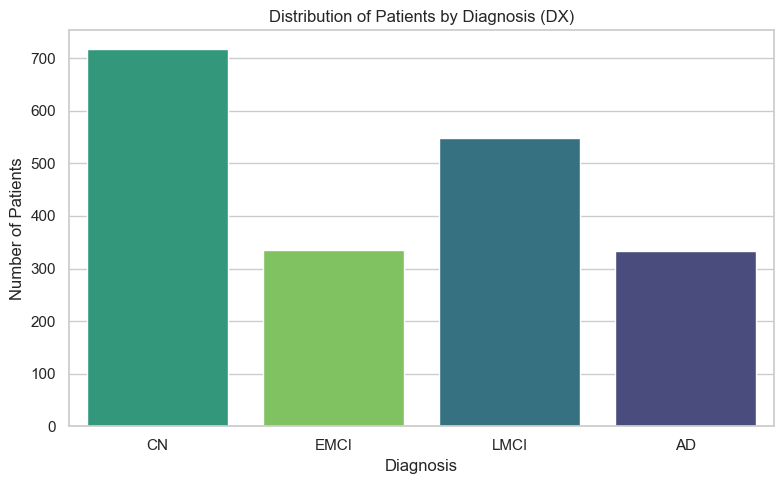

In [5]:
viz.count_plot(
    x='DX',
    figsize=(8, 5),
    palette="viridis",
    order = ["CN", "EMCI", "LMCI", "AD"],
    xlabel="Diagnosis",
    ylabel="Number of Patients",
    title="Distribution of Patients by Diagnosis (DX)"
)

In [6]:
print(dataset['DX'].value_counts())

DX
CN      717
LMCI    548
EMCI    336
AD      333
Name: count, dtype: int64


We see that: 
- CN:   717 -> 37.07%
- EMCI: 336 -> 17.37%
- LMCI: 548 -> 28.34%
- AD:   333 -> 17.22%

CN is the largest class, followed by LMCI, EMCI and AD. This means that the distribution is not uniform: CN dominates the sample, but the other classes are not rare. **This means that the classes are slightly unbalanced and that more care must be taken in building machine learning models and evaluating those models.**

The most robust options for handling this slight imbalance in classes are tree-based models and using class weights. Furthermore, we can't rely solely on Accuracy. 

On the other hand we have the **sampled dataset**, created in the **Preprocessing Notebook**, to solve this problem. 

## Demographics Analysis

Now we analyze the patients' demographics informations. 

### Sex (PTGENDER)

In [7]:
gender_map = {1: "Male", 0: "Female"}
print(viz.dataset['PTGENDER'].map(gender_map).value_counts())

PTGENDER
Male      1021
Female     913
Name: count, dtype: int64


We note that the male/female ratio is very close to 1. Males make up approximately 52.6% of the sample, while females make up approximately 47.4%. Therefore, we find ourselves in a relatively balanced context with regards to gender and therefore there is no serious imbalance in the data.

In [8]:
viz.dataset['Gender_label'] = viz.dataset['PTGENDER'].map(gender_map)
ct = pd.crosstab(viz.dataset['Gender_label'], viz.dataset['DX'], normalize='index')
ct = ct.reindex(columns=['CN', 'EMCI', 'LMCI', 'AD'])
display(ct)

DX,CN,EMCI,LMCI,AD
Gender_label,,,,
Female,0.451260,0.165389,0.224535,0.158817
Male,0.298727,0.181195,0.335945,0.184133


Let's interpret the values:
- **Female:**
    - **CN (45.13%):** women have a relatively high rate of cognitively normal.
    - **EMCI (16.54%):** similar to males (18.12%).
    - **LMCI (22.45%):** much lower than males.
    - **AD (15.89%):**  slightly lower than males.
- **Male:**
    - **CN (29.87%):** much lower than females.
    - **EMCI (18.12%):** similar to females (16.54%). 
    - **LMCI (33.59%):** much higher (dominant in males).
    - **AD (18.41%):** slightly higher than females.

In our dataset, therefore, males are more affected by more severe forms of senile dementia than females who are statistically healthier.
This is a bias in the dataset, as in reality [more women develop Alzheimer's than men](https://pmc.ncbi.nlm.nih.gov/articles/PMC10321561/) (both due to their greater longevity, but also for other biological reasons that may be linked to estrogen or amyloid). 

That's why we now control sex based on age and the APOE4 allele.

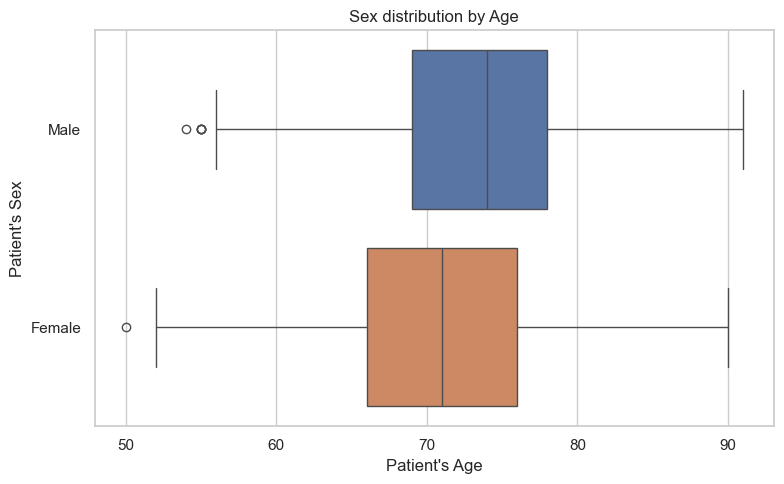

In [9]:
viz.dataset['Gender_label'] = viz.dataset['PTGENDER'].map(gender_map)
viz.box_plot(x="AGE", 
             y="Gender_label", 
             figsize=(8, 5),
             xlabel="Patient's Age",
             ylabel="Patient's Sex",
             title="Sex distribution by Age")

We note that males in the dataset are **slightly older** and this may be a possible factor explaining why they have more **LMCI** and **AD**.

In [10]:
pd.crosstab(viz.dataset["Gender_label"], viz.dataset["APOE4"])

APOE4,0,1,2
Gender_label,,,
Female,497,342,74
Male,546,381,94


In percentages:
- **Females:** 55.29% (0), 36.42% (1), 8.29% (2).
- **Males:** 53.20% (0), 36.48% (1), 10.32% (2).

APOE4 distributions are very similar between the sexes. Overall, APOE4 genetics are balanced between men and women in this dataset.

*We can conclude that the most severe diagnoses of senile dementia are in men since in this dataset they tend to be older and have a slightly higher presence of APOE4.*

### Age

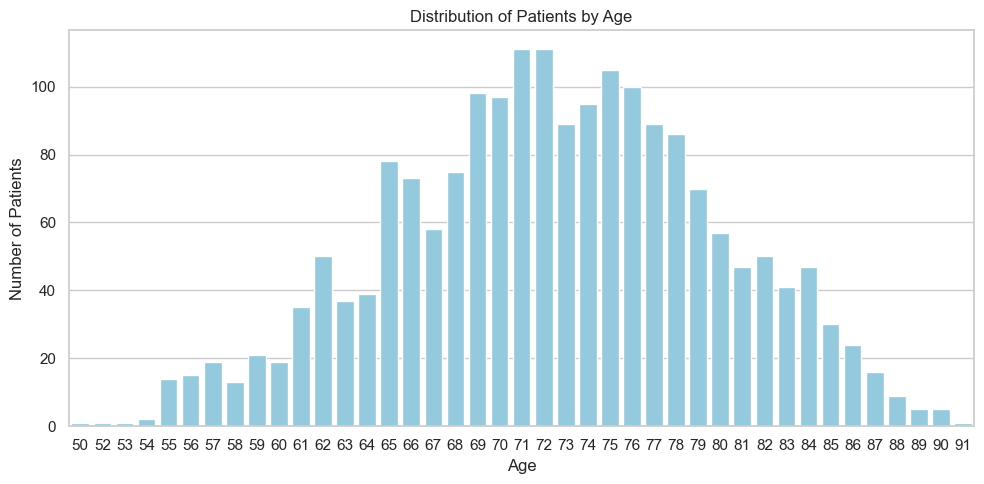

In [11]:
viz.bar_plot(x="AGE", 
            figsize=(10, 5),
            color="skyblue",
            xlabel="Age",
            ylabel="Number of Patients",
            title="Distribution of Patients by Age")


The age of the patients ranges from 50 to 91 years and is concentrated around the seventies.

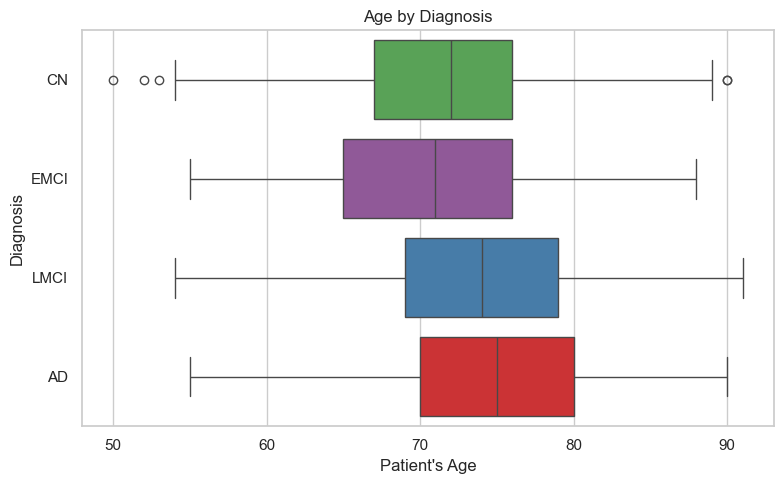

In [12]:
viz.box_plot(x="AGE", 
             y='DX', 
             figsize=(8, 5),
             palette="Set1",
             order=['CN', 'EMCI', 'LMCI', 'AD'],
             xlabel="Patient's Age",
             ylabel="Diagnosis",
             title="Age by Diagnosis")

Let's make some observations about the boxplot.
- The medians of **AD** and **LMCI** appear to be shifted toward higher age values ​​compared to other diagnoses. This indicates that subjects with more severe diagnoses tend to be older. Obviously, this is consistent with reality. 
- It's strange that **CN** has a greater median than **EMCI**. This is likely due to dataset bias.
- The **CN** and **LMCI** groups show very extended *whiskers* (the two lines outside the box extended to Minimum and Maximum). Therefore, there is greater age variability in these groups.
- *Outliers* are noted for values ​​close to 50 and for values ​​close to 90, but only for **CN**.
- Although the medians differ, the IQRs and whiskers overlap significantly. Therefore, age alone does not perfectly separate the diagnostic categories.

*Age is clearly associated with diagnosis (the more severe the diagnosis, the older the patient), but it is not a perfect separator: the intervals overlap a lot, so on its own it does not classify patients well.*

### Educational Level (PTEDUCAT)

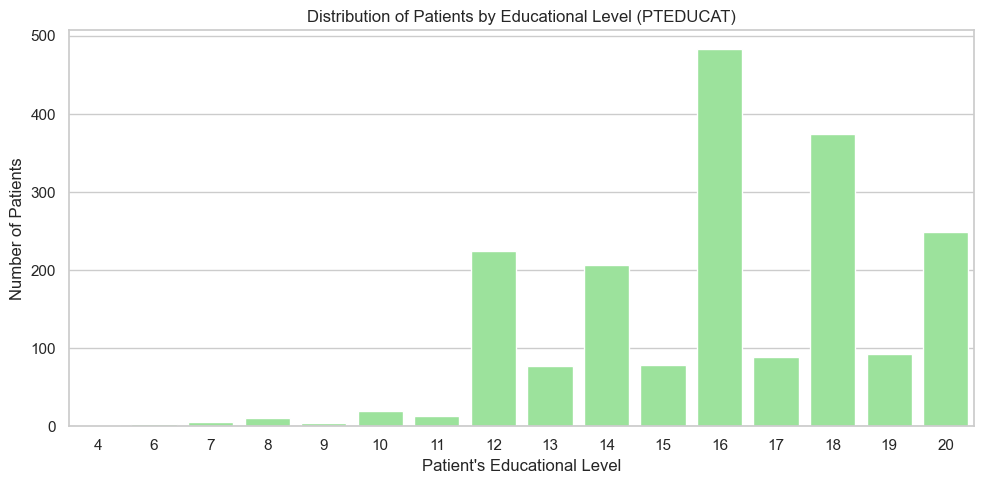

In [13]:
viz.count_plot(
    x="PTEDUCAT",
    figsize=(10, 5),
    color="lightgreen",
    xlabel="Patient's Educational Level",
    ylabel="Number of Patients",
    title="Distribution of Patients by Educational Level (PTEDUCAT)"
)

In [14]:
print(dataset['PTEDUCAT'].value_counts())

PTEDUCAT
16    483
18    375
20    249
12    225
14    206
19     92
17     89
15     79
13     77
10     20
11     13
8      11
7       6
9       4
6       3
4       2
Name: count, dtype: int64


Most people in the dataset have at least 10 years of education. 

In [15]:
ct = pd.crosstab(viz.dataset['PTEDUCAT'], viz.dataset['DX'], normalize='index')
ct = ct.reindex(columns=['CN', 'EMCI', 'LMCI', 'AD'])
display(ct)

DX,CN,EMCI,LMCI,AD
PTEDUCAT,,,,
4,0.000000,0.000000,0.500000,0.500000
6,0.333333,0.000000,0.333333,0.333333
7,0.333333,0.000000,0.333333,0.333333
8,0.181818,0.000000,0.454545,0.363636
9,0.250000,0.000000,0.500000,0.250000
10,0.250000,0.050000,0.400000,0.300000
11,0.000000,0.153846,0.461538,0.384615
12,0.226667,0.217778,0.320000,0.235556
13,0.350649,0.194805,0.285714,0.168831


### APOE4

**APOE** (Apolipoprotein E) is a gene that encodes a protein involved in the transport of lipids in the blood and brain. [The **ε4** allele increases the risk of developing Alzheimer's, especially if present in two copies](https://pubmed.ncbi.nlm.nih.gov/8618665/). When genetic testing is done, the number of copies of the ε4 allele a person has is counted:
- **0:** No copies of APOE4 do not increase the risk of Alzheimer's.
- **1:** One copy of APOE4 leads to an increased risk of Alzheimer's.
- **2:** Two copies of APOE4 lead to a significantly higher risk of Alzheimer's.

APOE4 does not itself cause Alzheimer's, but it is a significant risk factor.

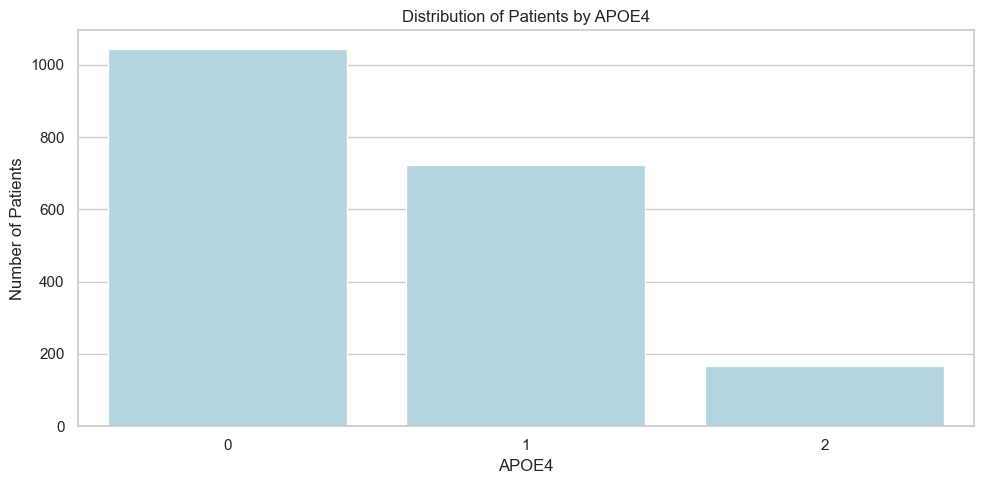

In [16]:
viz.count_plot(
    x="APOE4",
    figsize=(10, 5),
    color="lightblue",
    xlabel="APOE4",
    ylabel="Number of Patients",
    title="Distribution of Patients by APOE4"
)

In [17]:
print(dataset['APOE4'].value_counts())
print("")
print(dataset['APOE4'].value_counts(normalize=True) * 100)


APOE4
0    1043
1     723
2     168
Name: count, dtype: int64

APOE4
0    53.929679
1    37.383661
2     8.686660
Name: proportion, dtype: float64


The majority of participants have no ε4 alleles (APOE4=0). Approximately 36% have at least one ε4 allele, with a minority (9%) having two alleles.

In [18]:
ct = pd.crosstab(viz.dataset['APOE4'], viz.dataset['DX'], normalize='index')
ct = ct.reindex(columns=['CN', 'EMCI', 'LMCI', 'AD'])
display(ct)

DX,CN,EMCI,LMCI,AD
APOE4,,,,
0,0.471716,0.186002,0.240652,0.101630
1,0.284924,0.168741,0.329184,0.217151
2,0.113095,0.119048,0.351190,0.416667


- **CN** and **EMCI** decreases with increasing ε4 alleles.
- **LMCI** and **AD** increase with ε4.

## Clinical and Composite Scores Analysis

Clinical Scores are `MMSE`, `CDRSB`, `ADAS13`, `LDELTOTAL`, `FAQ`, `MOCA`, `TRABSCOR` `RAVLT_immediate`, `RAVLT_learning`, `RAVLT_perc_forgetting`. The only remaining Composite Score is `mPACCdigit` We calculate the mean, median, std, min, max, and quartiles for each score.

In [19]:
scores = ["MMSE", "CDRSB", "ADAS13", "LDELTOTAL", "FAQ", "MOCA", "TRABSCOR",
          "RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting", "mPACCdigit"]

dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
MMSE,1934.0,27.379524,2.651848,16.0000,26.000000,28.000000,29.000000,30.00000
CDRSB,1934.0,1.451138,1.762419,0.0000,0.000000,1.000000,2.000000,10.00000
ADAS13,1934.0,15.904860,9.536558,0.0000,9.000000,14.000000,22.000000,55.00000
LDELTOTAL,1934.0,7.784385,5.412765,0.0000,3.000000,8.000000,12.000000,22.00000
FAQ,1934.0,3.787487,6.034718,0.0000,0.000000,1.000000,5.000000,30.00000
MOCA,1934.0,23.002585,4.086430,4.0000,21.000000,23.000000,26.000000,30.00000
TRABSCOR,1934.0,117.346949,73.864392,21.0000,66.000000,91.000000,139.000000,300.00000
RAVLT_immediate,1934.0,36.516546,12.641930,1.0000,27.000000,36.000000,45.000000,70.00000
RAVLT_learning,1934.0,4.491727,2.811675,-4.0000,2.000000,4.000000,7.000000,12.00000
RAVLT_perc_forgetting,1934.0,55.965249,34.733470,-100.0000,27.272700,55.555600,100.000000,100.00000


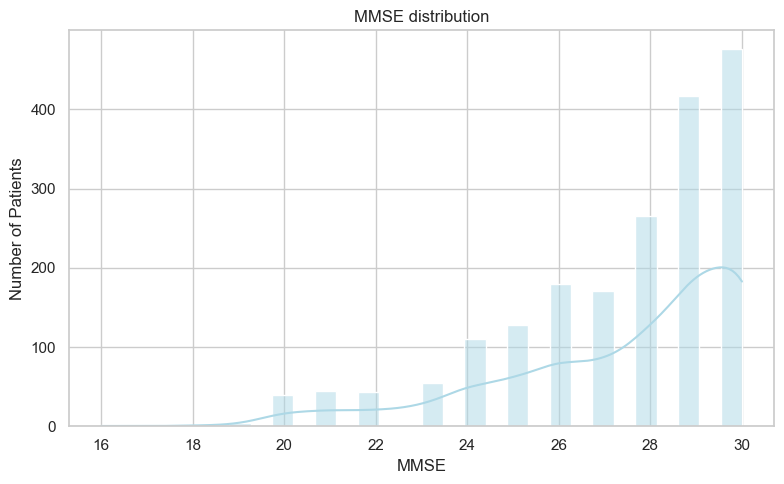

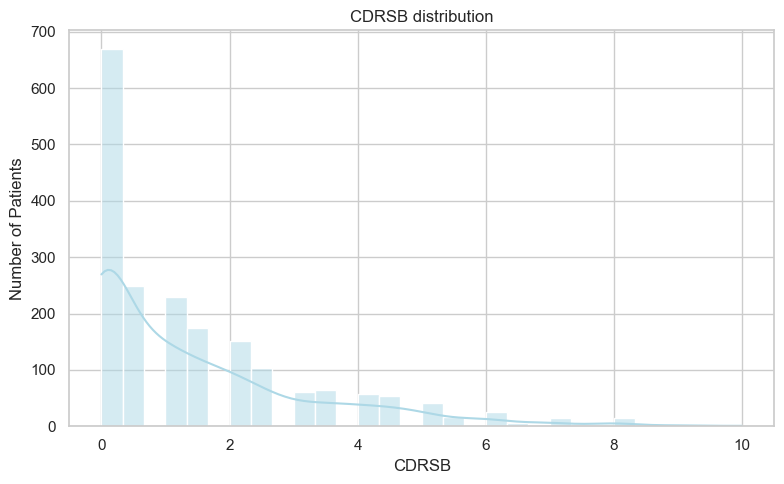

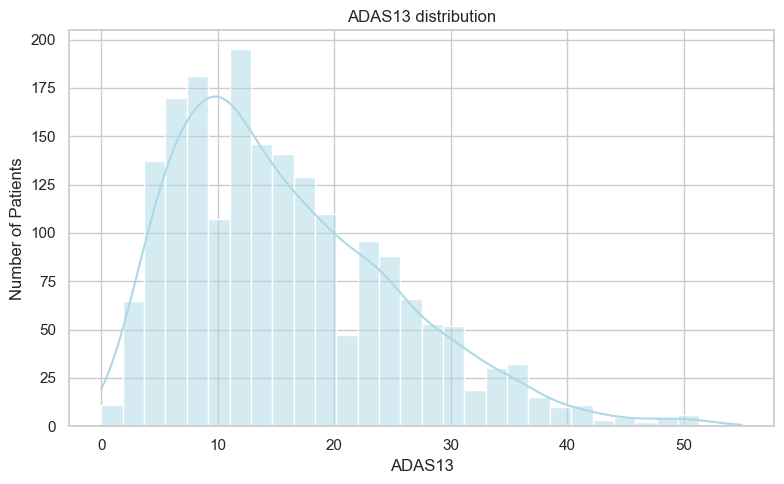

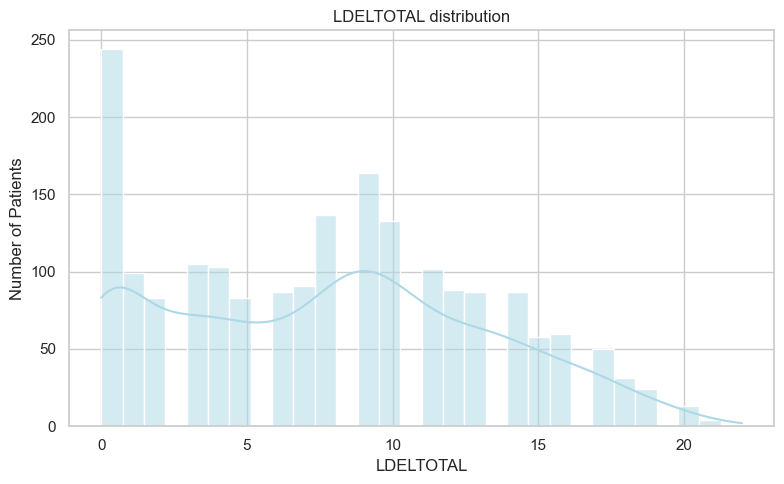

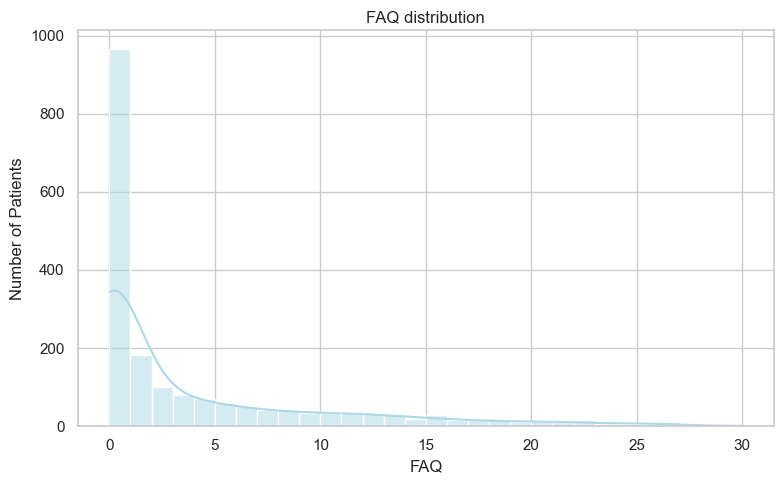

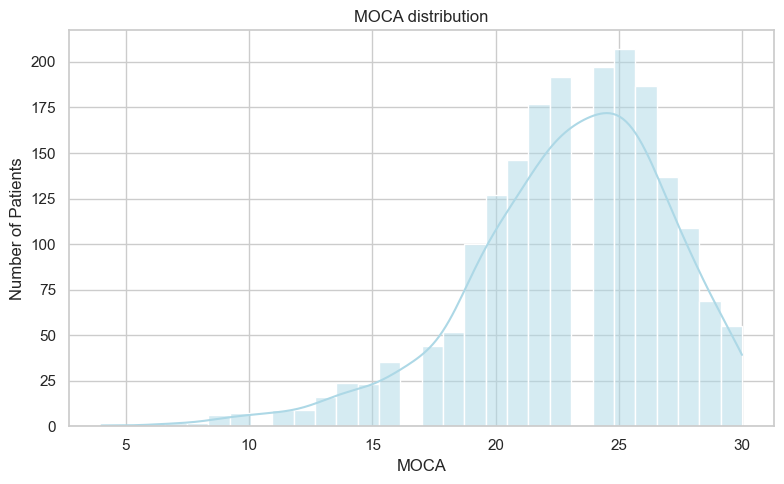

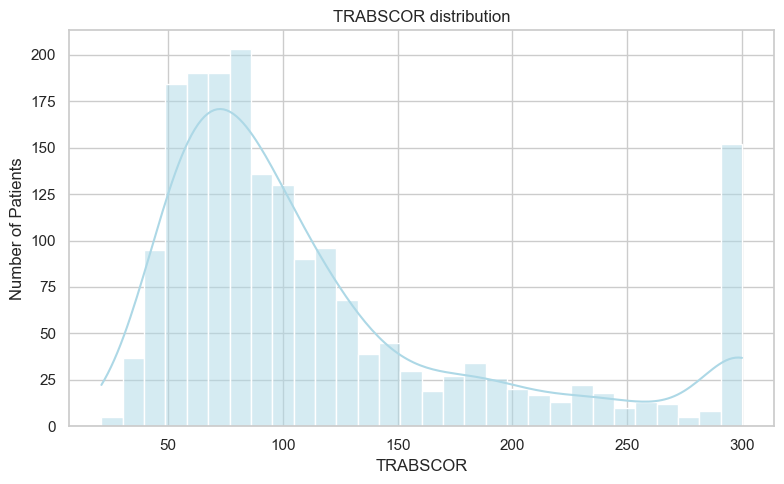

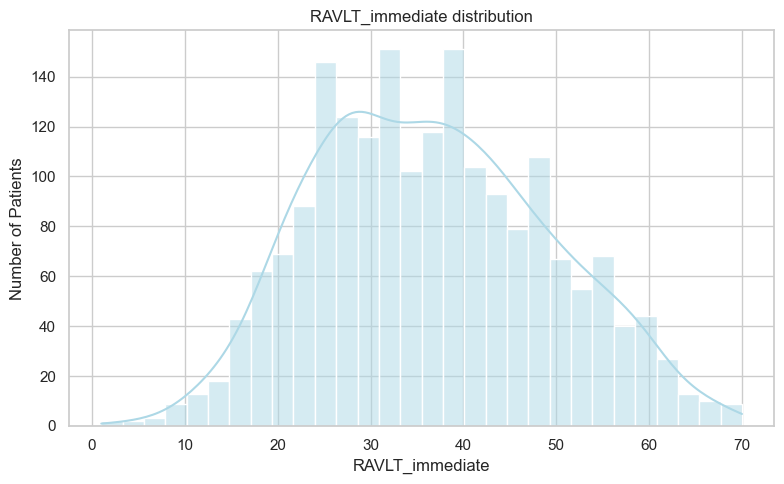

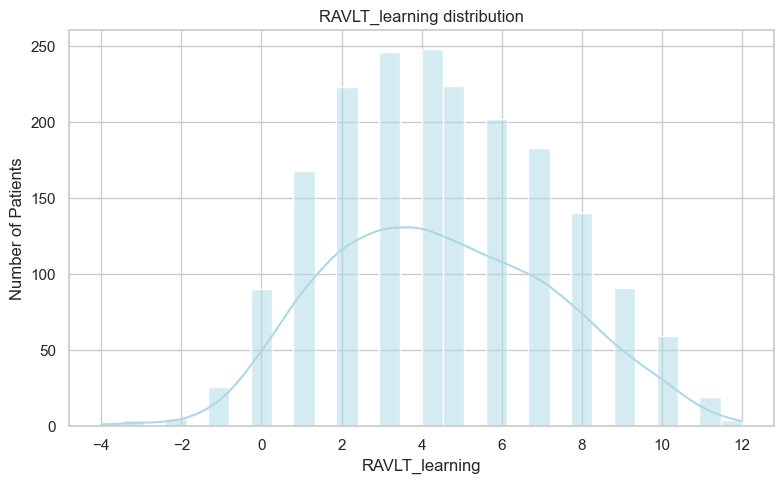

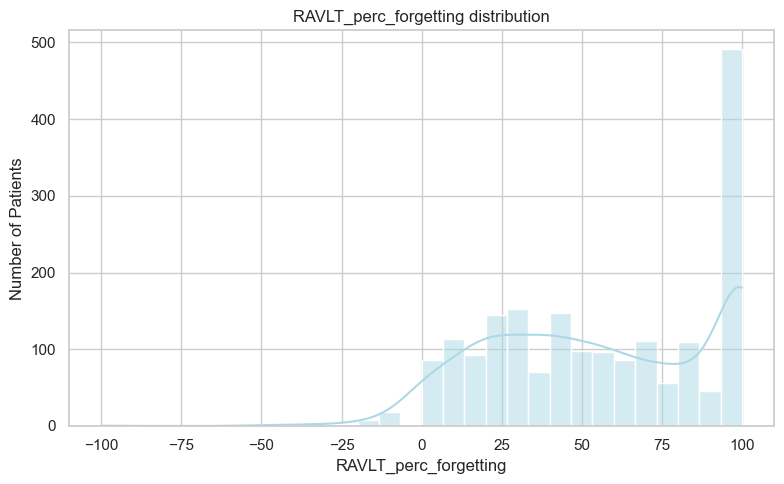

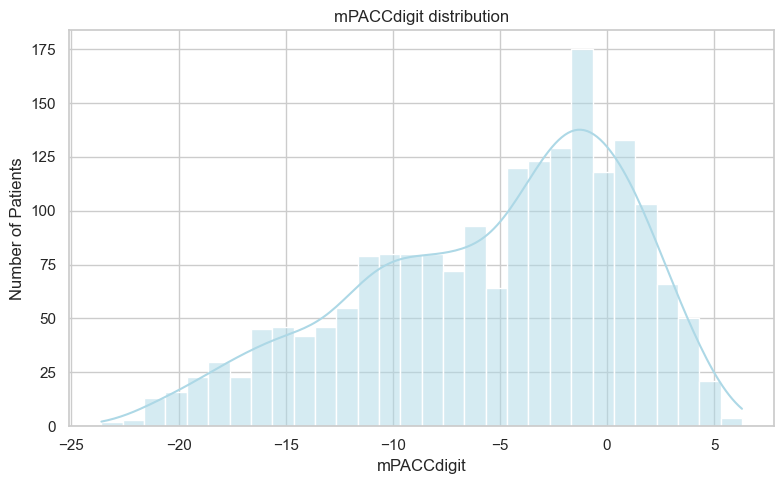

In [20]:
for col in scores:
    viz.histogram(
        x=col,
        figsize=(8, 5),
        color="lightblue",
        kde=True,
        xlabel=col,
        ylabel="Number of Patients",
        title=f"{col} distribution"
    )

Many scores (`MMSE`, `MOCA`, `LDELTOTAL`, `RAVLT_immediate`) show skewed, tailed (non-Gaussian) distributions. `TRABSCOR` and `RAVLT_perc_forgetting` have extreme tails and many outliers.

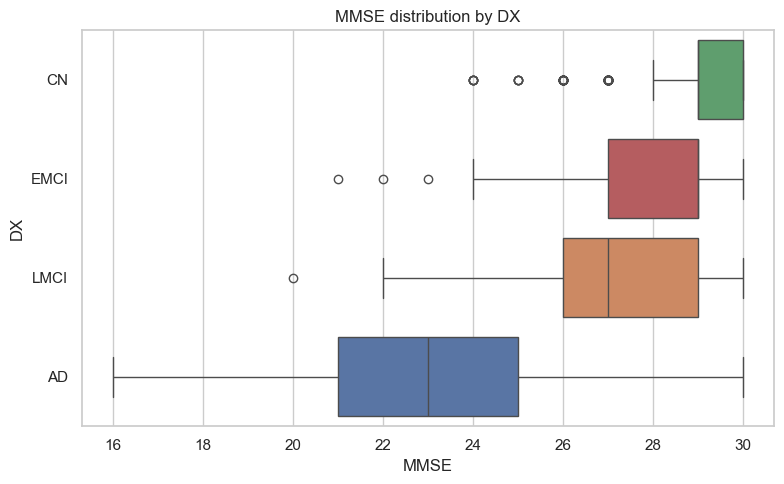

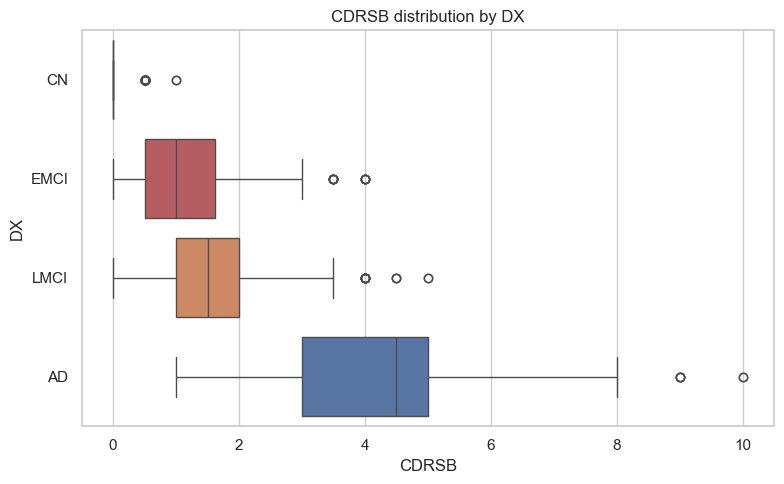

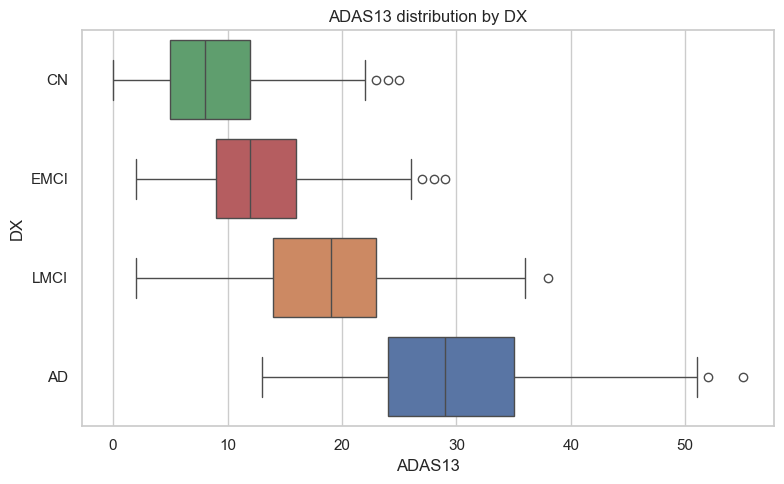

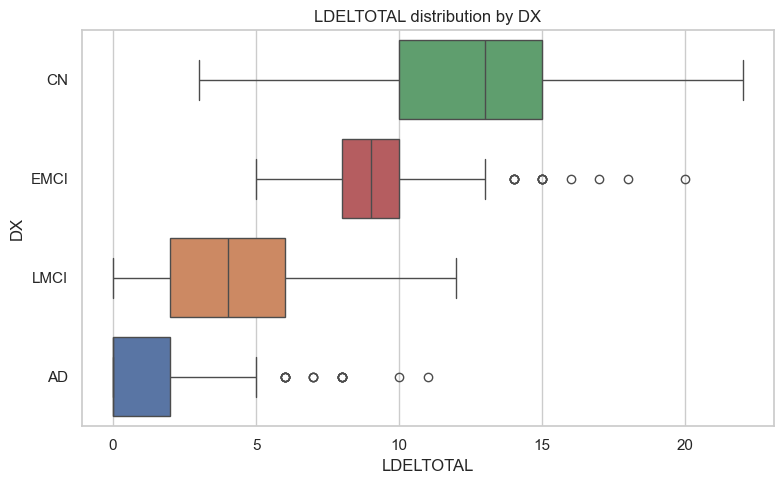

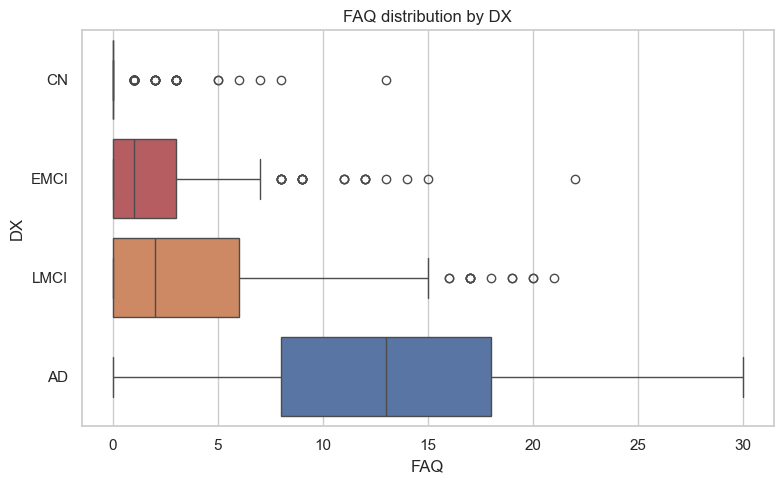

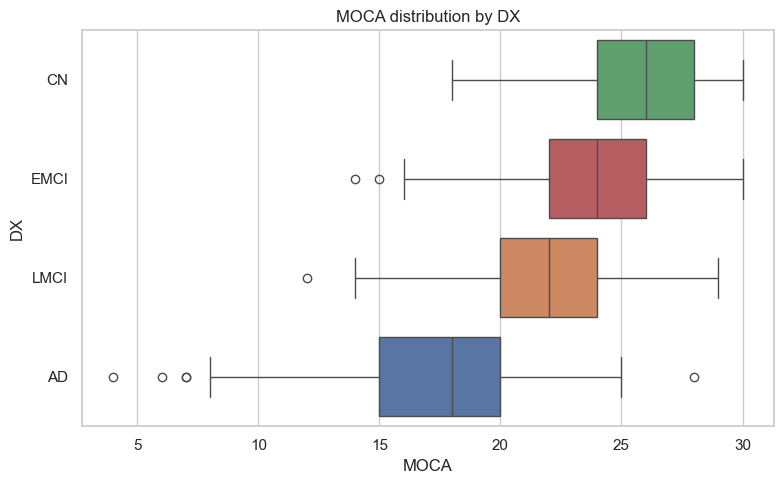

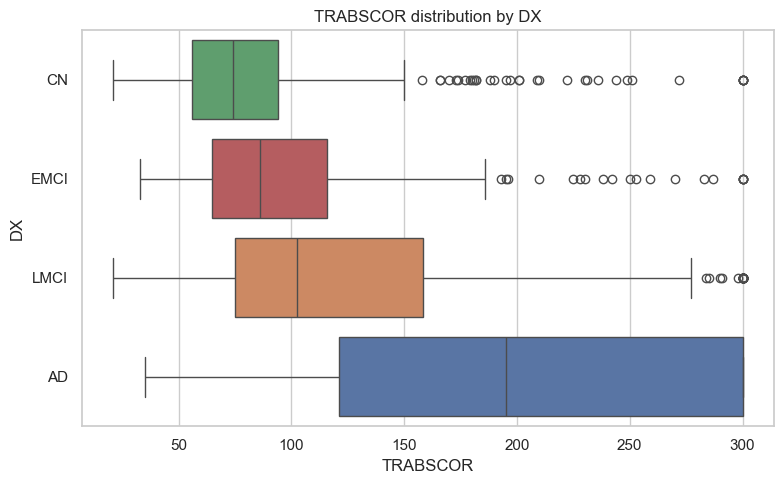

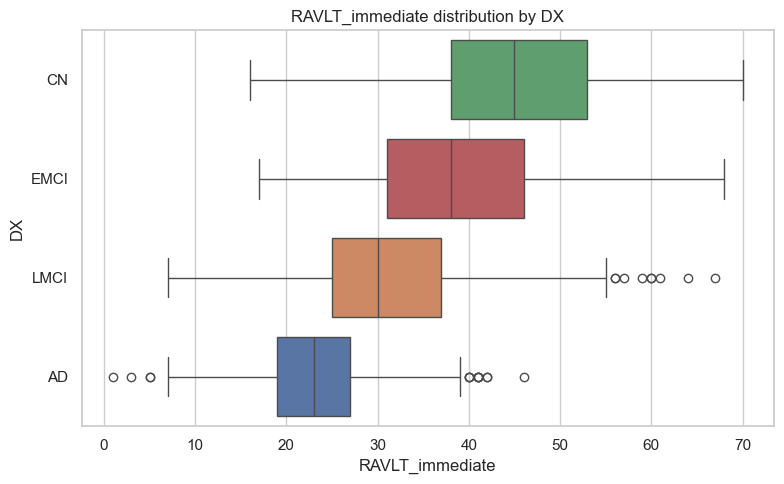

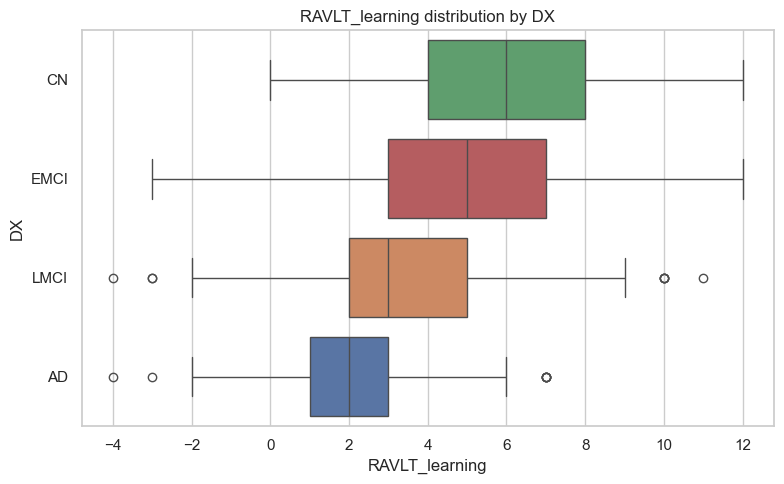

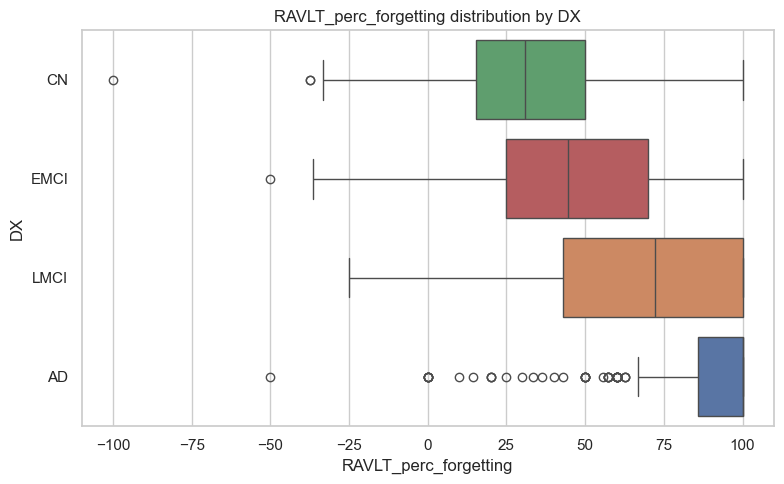

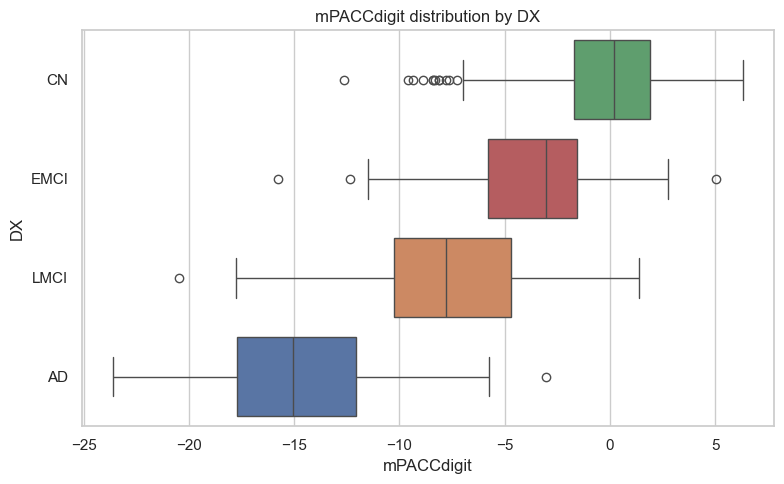

In [21]:
for col in scores:
    viz.box_plot(
        x=col,
        y='DX',
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The expected patterns are observed: moving from **CN** to **AD**, the `MMSE`, `MOCA`, `LDELTOTAL`, `RAVLT_immediate` and `RAVLT_learning` scores tend to decrease, while `CDRSB`, `ADAS13`, `FAQ`, `TRABSCOR`, `RAVLT_perc_forgetting`, and `mPACCdigit` progressively increase. However, the interquartile ranges (*IQR*) of the different classes show strong overlap, indicating a high degree of overlap between the groups.

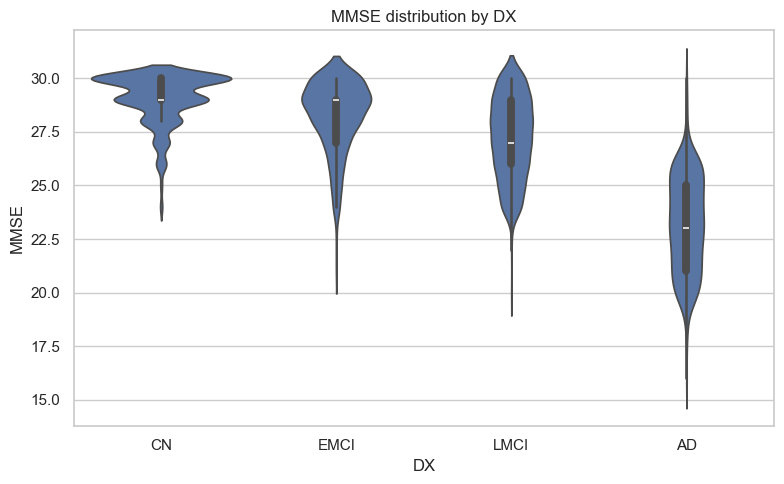

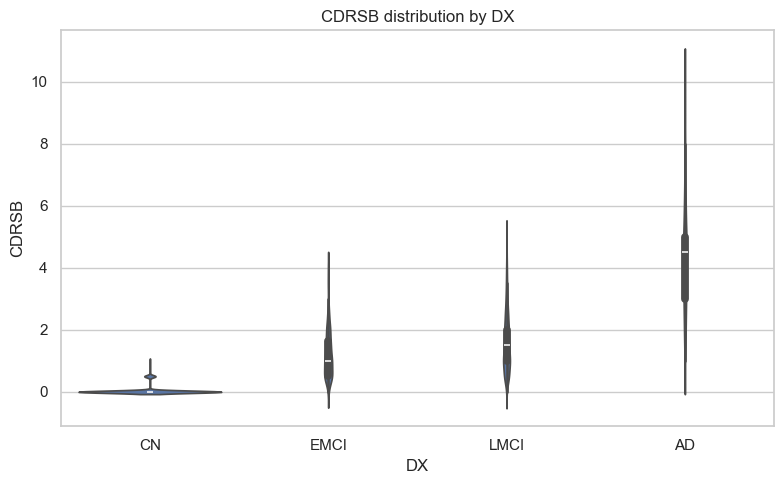

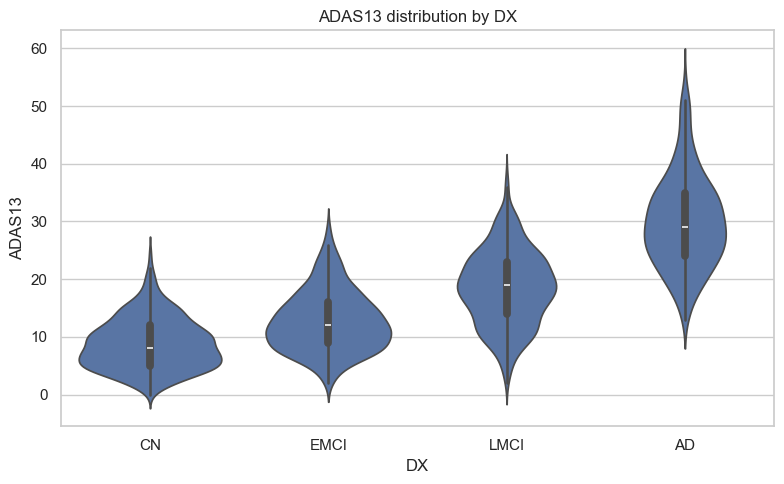

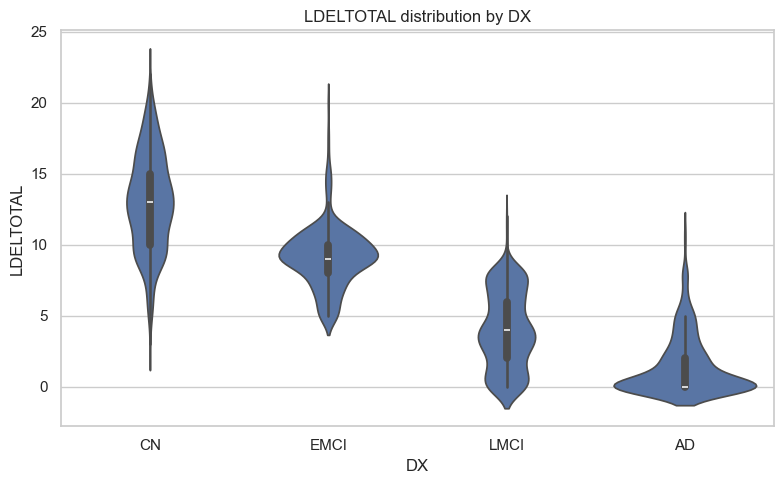

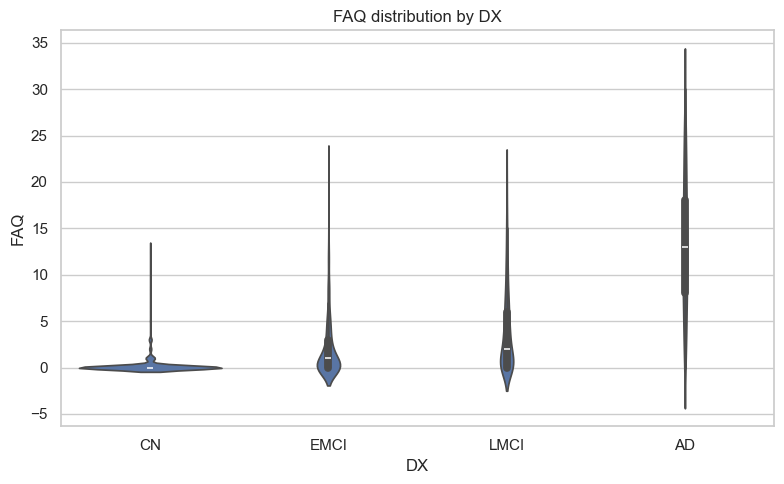

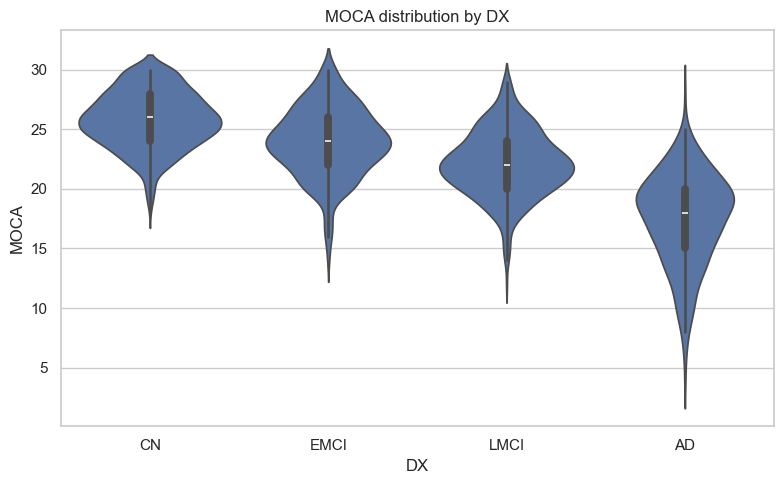

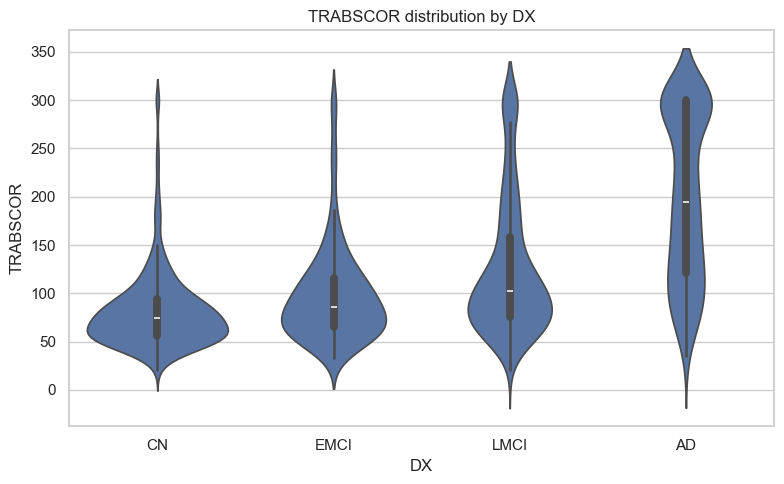

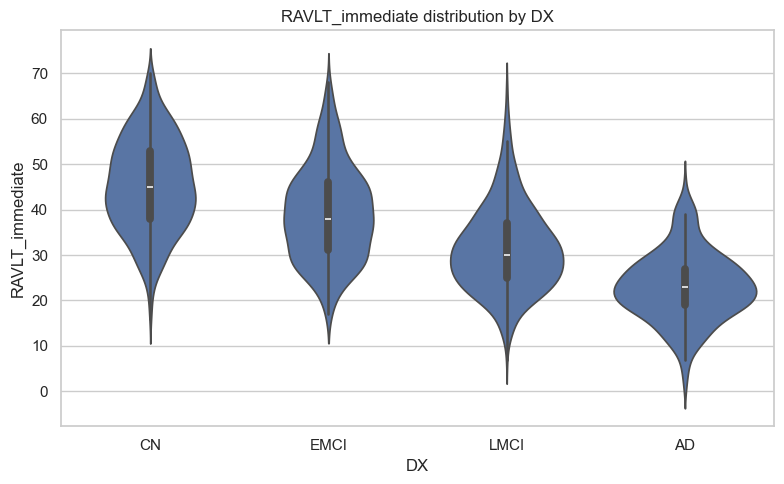

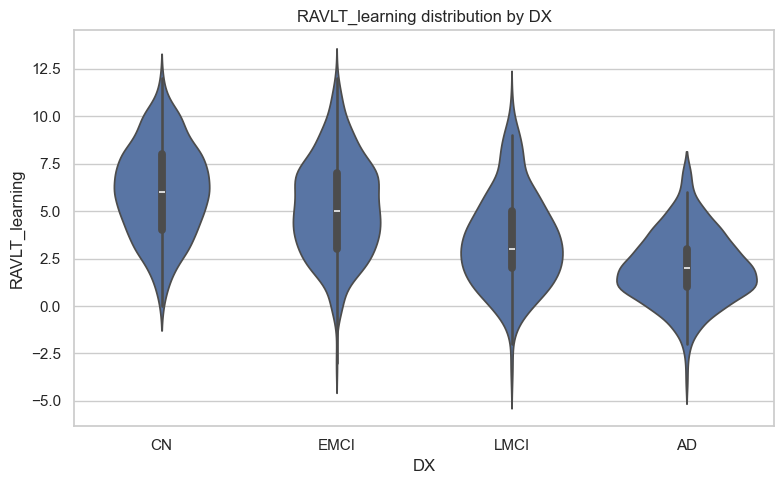

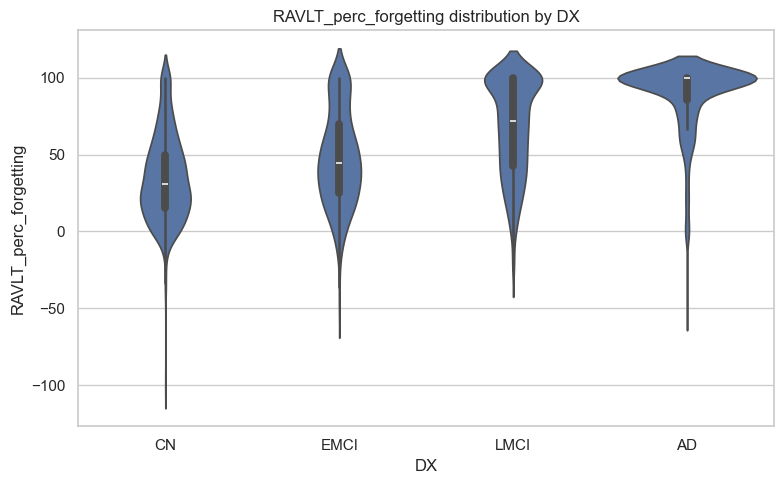

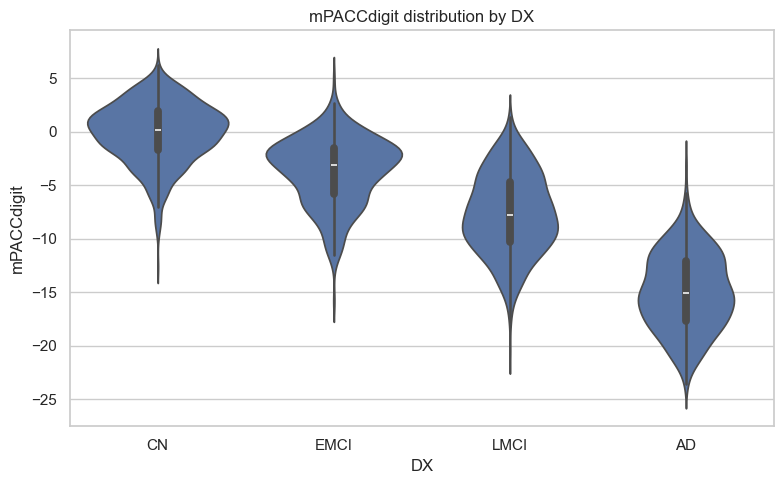

In [22]:
for col in scores:
    viz.violin_plot(
        x='DX',
        y=col,
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel='DX',
        ylabel=col,
        title=f"{col} distribution by DX"
    )

The violin plots compare the full distribution of each cognitive/clinical score across diagnosis groups (**CN**, **EMCI**, **LMCI**, **AD**). They show clear shifts in central tendency for expected measures: cognitive performance scores (`MMSE`, `MOCA`, `LDELTOTAL`, `RAVLT_immediate`) tend to decrease from **CN** to **AD**, while clinical/functional scores (`CDRSB`, `ADAS13`, `FAQ`, `TRABSCOR`, `RAVLT_perc_forgetting`, `mPACCdigit`) increase.  Despite those shifts, the violins reveal wide overlap of distributions and long tails for many features (skewness and outliers), so no single score perfectly separates diagnoses. This supports using multiple features and robust models. 

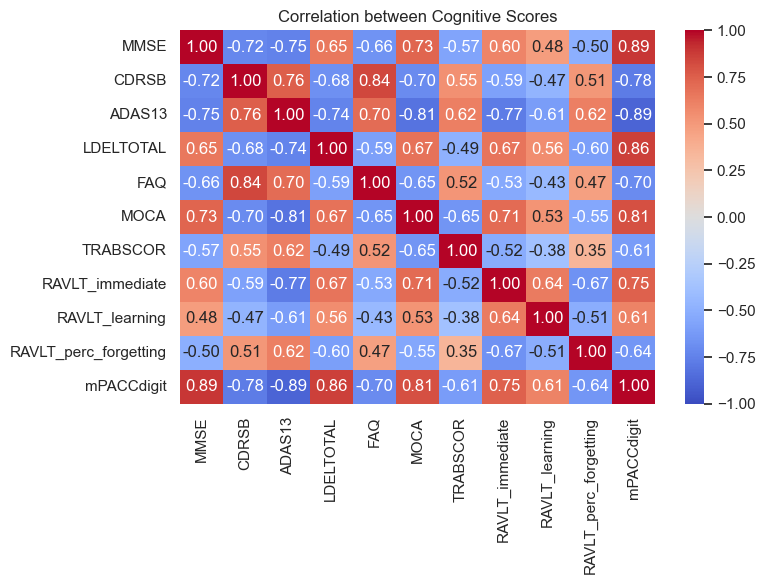

In [23]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between Cognitive Scores")

There is significant collinearity between the cognitive scores and thus a risk of multicollinearity in the models. There is significant collinearity among the cognitive scores and therefore a risk of multicollinearity in the models. This leads us to use tree-based models for prediction that handle collinearity well.

## EcogPT Analysis

Now we go with `EcogPT` measures. The EcogPt attributes derive from the Everyday Cognition scale – Patient version, i.e. the version self-completed by the patient. A higher score indicates worse daily functioning.
- `EcogPTMem`: Everyday memory (e.g., remembering appointments or where things are placed)
- `EcogPTLang`: Language and communication (e.g., finding words, understanding conversations)
- `EcogPTVisspat`: Visuospatial skills (e.g., orienting oneself, following maps, recognizing routes)
- `EcogPTPlan`: Planning and organizing daily activities
- `EcogPTOrgan`: General organization and management of complex tasks
- `EcogPTDivatt`: Attention and ability to manage multiple tasks simultaneously (divided attention)

In [24]:
scores = ["EcogPtMem", "EcogPtLang", "EcogPtVisspat", "EcogPtPlan", "EcogPtOrgan", "EcogPtDivatt"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
EcogPtMem,1934.0,2.080350,0.645676,1.0,1.625000,2.000000,2.500000,4.00000
EcogPtLang,1934.0,1.722677,0.569450,1.0,1.250695,1.622222,2.037897,4.00000
EcogPtVisspat,1934.0,1.403360,0.470948,1.0,1.000000,1.285710,1.590476,3.83333
EcogPtPlan,1934.0,1.415238,0.493773,1.0,1.000000,1.240000,1.600000,4.00000
EcogPtOrgan,1934.0,1.515005,0.541883,1.0,1.100000,1.366666,1.783333,4.00000
EcogPtDivatt,1934.0,1.794218,0.643612,1.0,1.250000,1.750000,2.100000,4.00000


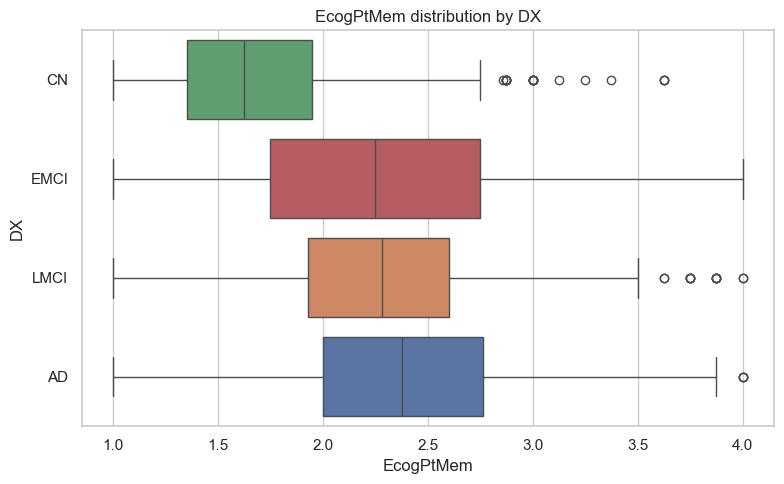

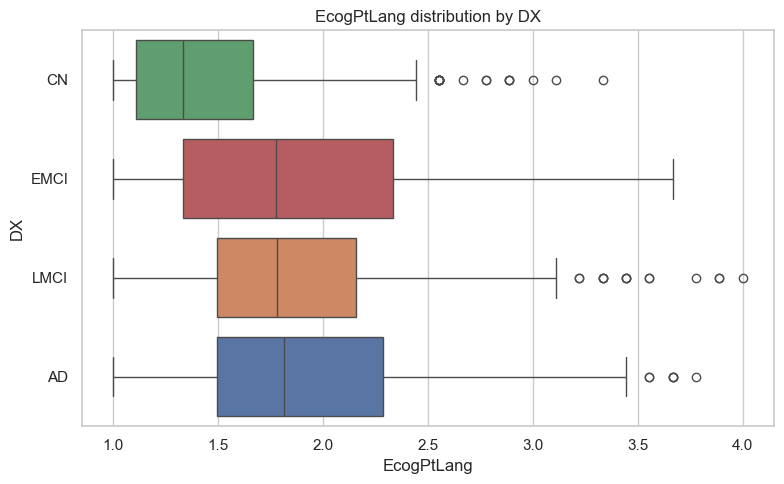

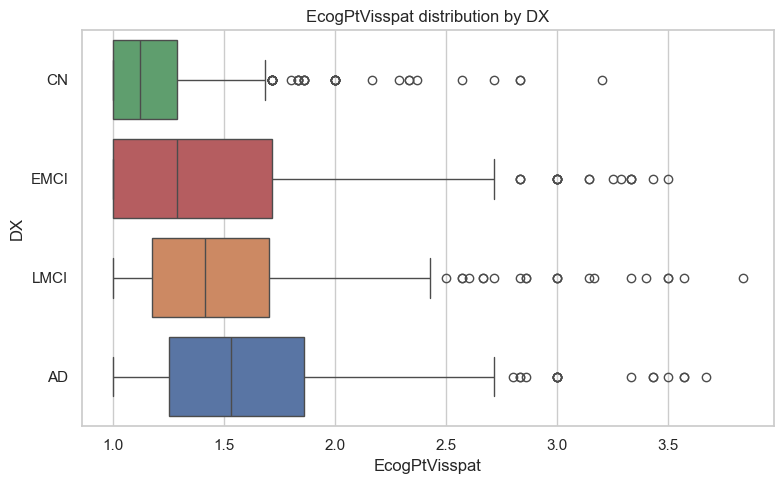

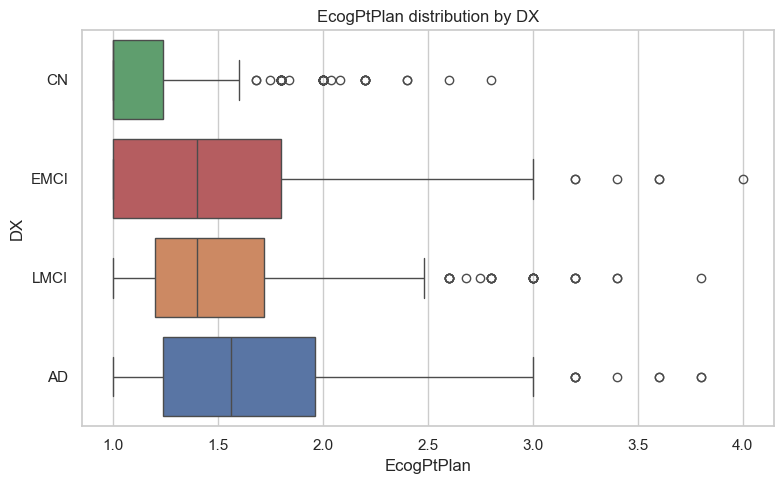

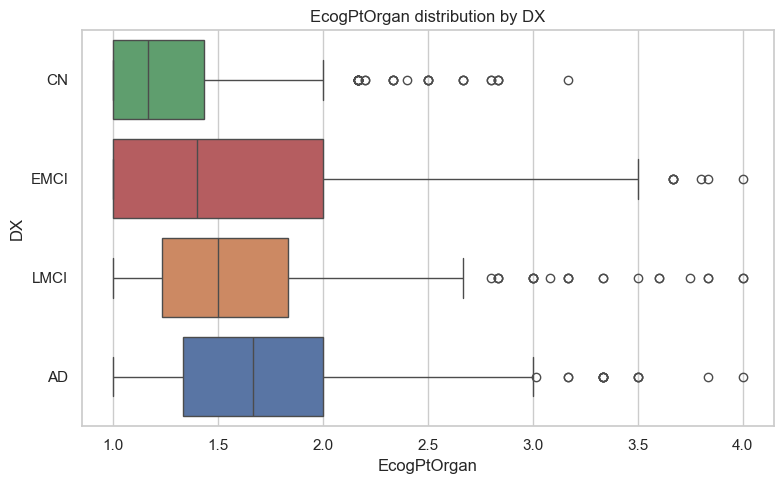

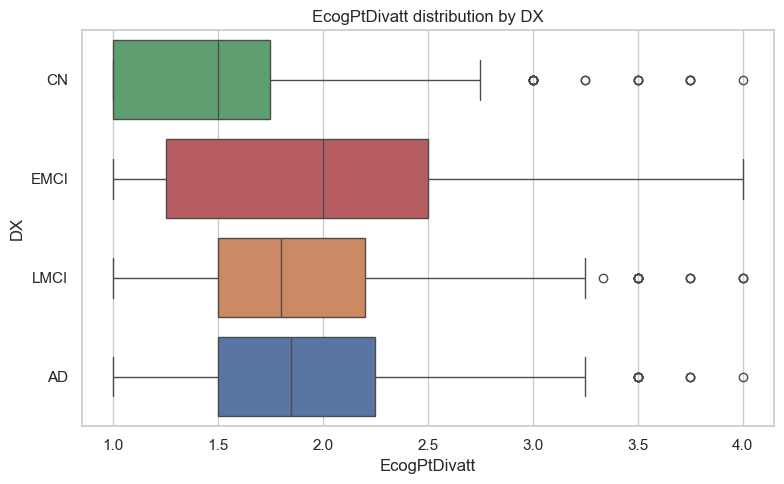

In [25]:
for col in scores:
    viz.box_plot(
        x=col,
        y='DX',
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

Self-reported scores (`EcogPt`) increase with severity of diagnosis, however variability is moderate and some subscales show limited dispersion (many values ​​close to 1–2). `EcogPT` are informative but less discriminatory than EcogSPs. This is expected because the subject will be much more biased than other external people.

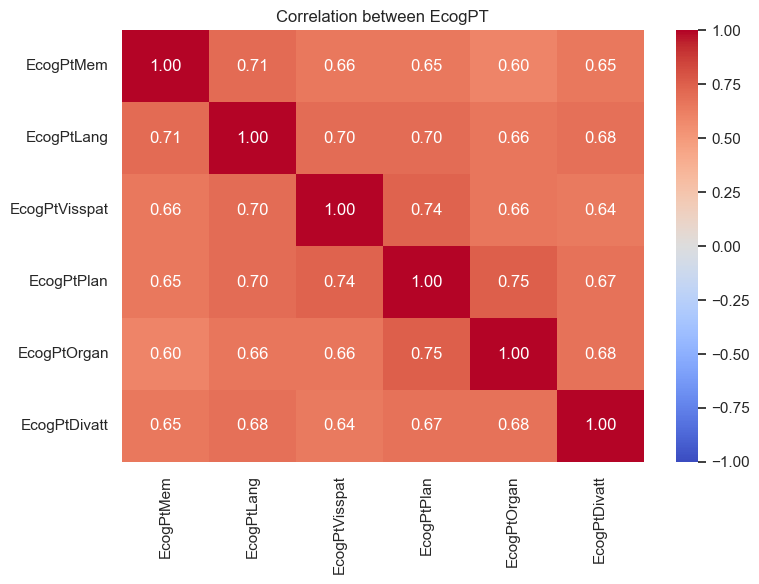

In [26]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between EcogPT")

Here too we have that the `EcogPT` are strongly correlated.

## EcogSP Analysis

Now we go with `EcogSP` measures. The EcogSP attributes are taken from the Everyday Cognition Scale – Study Partner version. This version is completed by a family member or study partner to assess the patient's daily functioning. A higher score indicates worse daily functioning.
- `EcogSPMem`: Everyday memory (e.g., remembering appointments or where things are placed)
- `EcogSPLang`: Language and communication (e.g., finding words, understanding conversations)
- `EcogSPVisspat`: Visuospatial skills (e.g., orienting oneself, following maps, recognizing routes)
- `EcogSPPlan`: Planning and organizing daily activities
- `EcogSPOrgan`: General organization and management of complex tasks
- `EcogSPDivatt`: Attention and ability to manage multiple tasks simultaneously (divided attention)

In [27]:
scores = ["EcogSPMem", "EcogSPLang", "EcogSPVisspat", "EcogSPPlan", "EcogSPOrgan", "EcogSPDivatt"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
EcogSPMem,1934.0,2.085856,0.880855,1.0,1.32500,1.875000,2.800000,4.0
EcogSPLang,1934.0,1.638981,0.690249,1.0,1.11111,1.358334,2.032637,4.0
EcogSPVisspat,1934.0,1.497187,0.667735,1.0,1.00000,1.169049,1.747619,4.0
EcogSPPlan,1934.0,1.589631,0.729368,1.0,1.00000,1.320000,1.960000,4.0
EcogSPOrgan,1934.0,1.680095,0.797243,1.0,1.00000,1.333332,2.066667,4.0
EcogSPDivatt,1934.0,1.877473,0.856167,1.0,1.06250,1.650000,2.462499,4.0


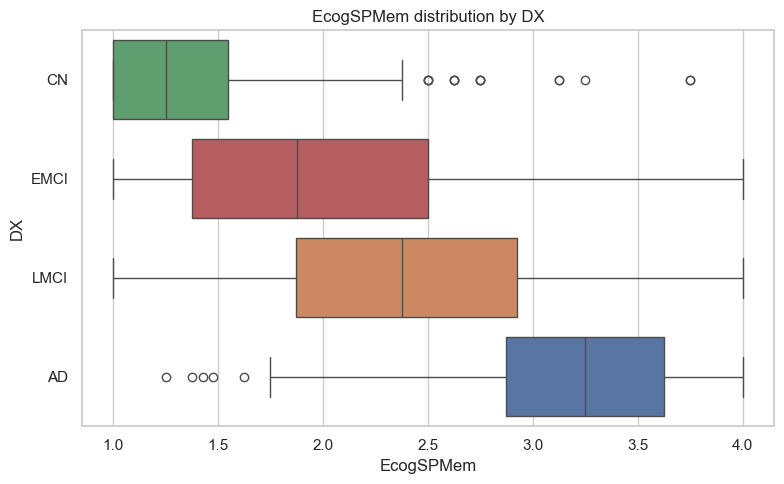

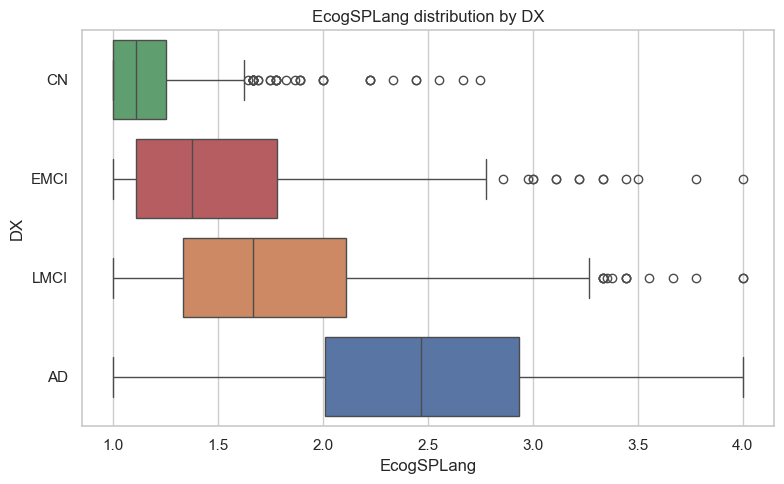

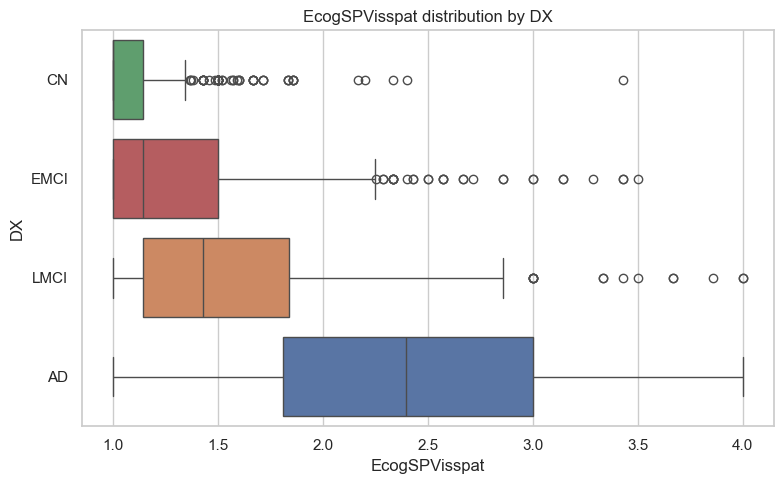

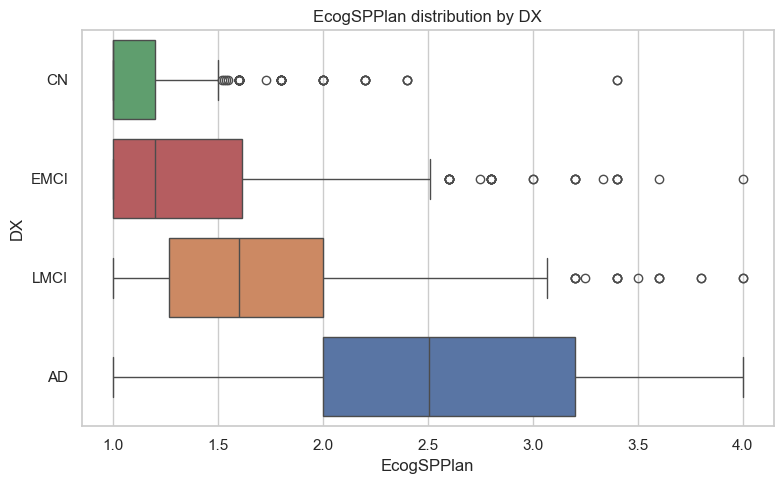

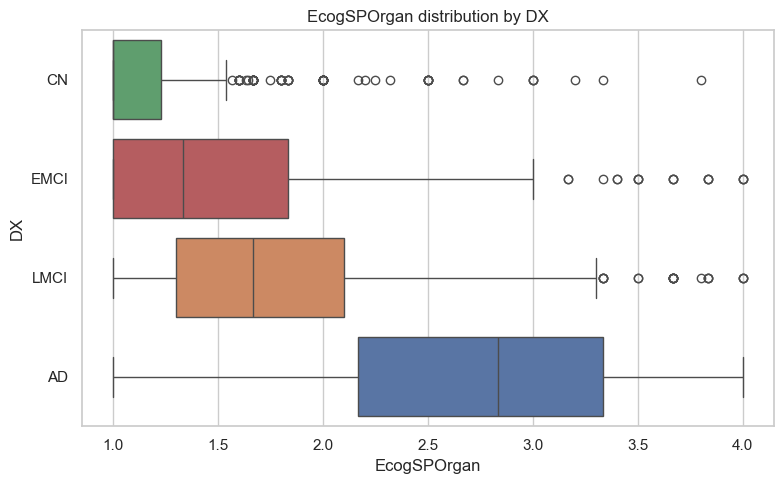

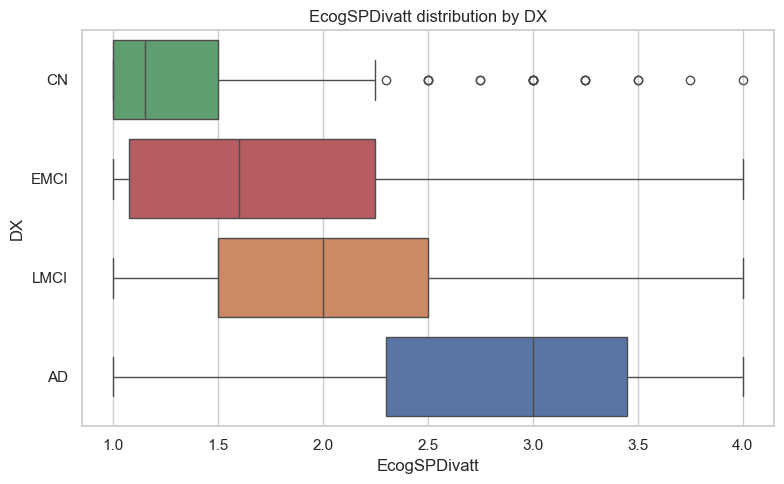

In [28]:
for col in scores:
    viz.box_plot(
        x=col,
        y='DX',
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The `EcogSP` measures, based on informant reports, exhibit wider variability and, in several cases, a better ability to distinguish between **CN**, **LMCI**, **EMCI**, and **AD** than the corresponding `EcogPT` measures. In particular, the `EcogSPMem` exhibits both a higher mean and a greater variance.

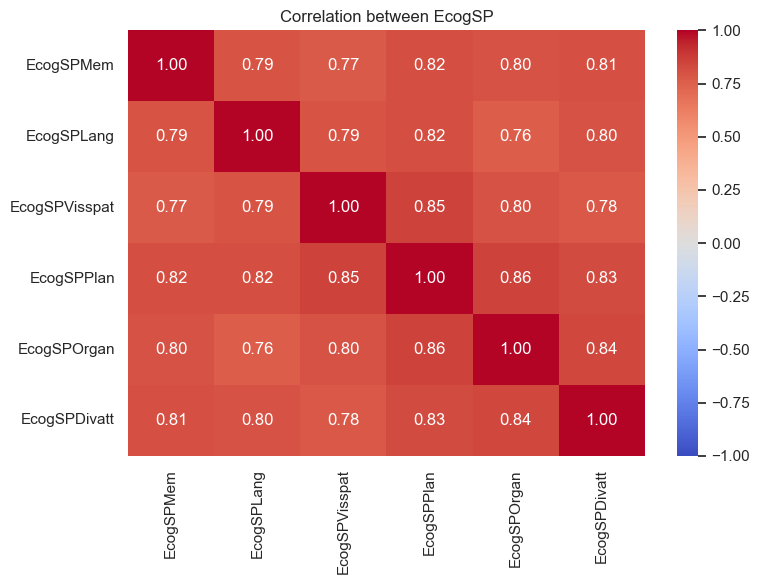

In [29]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between EcogSP")

Here too, there is a strong internal correlation between subscales.

## Biomarkers Analysis

**Biomarkers** mainly refer to measurements obtained from cerebrospinal fluid (CSF) and PET imaging. They are biological and functional indicators that reflect the pathological processes of Alzheimer's disease (amyloidosis, tauopathy, and neurodegeneration). 

In [30]:
scores = ["TAU/ABETA", "PTAU/ABETA", "FDG"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
TAU/ABETA,1934.0,0.359992,0.253476,0.073807,0.174607,0.265950,0.496250,2.400721
PTAU/ABETA,1934.0,0.035322,0.027075,0.006020,0.015390,0.024998,0.049154,0.245297
FDG,1934.0,1.212058,0.147623,0.621933,1.115513,1.228915,1.317429,1.776170


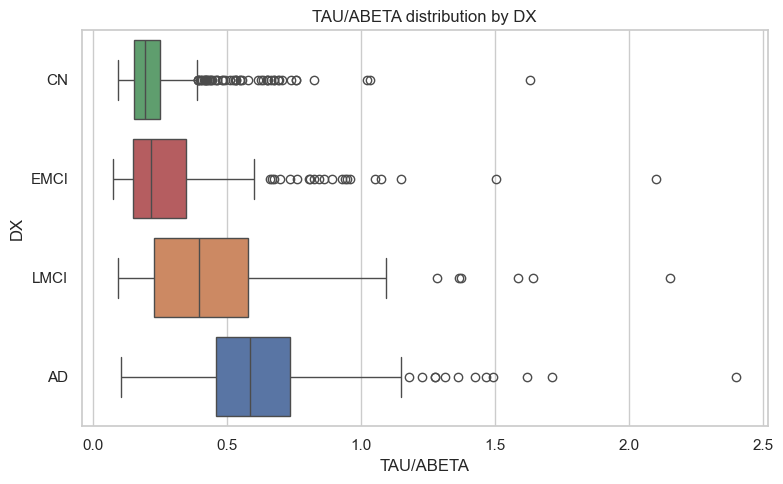

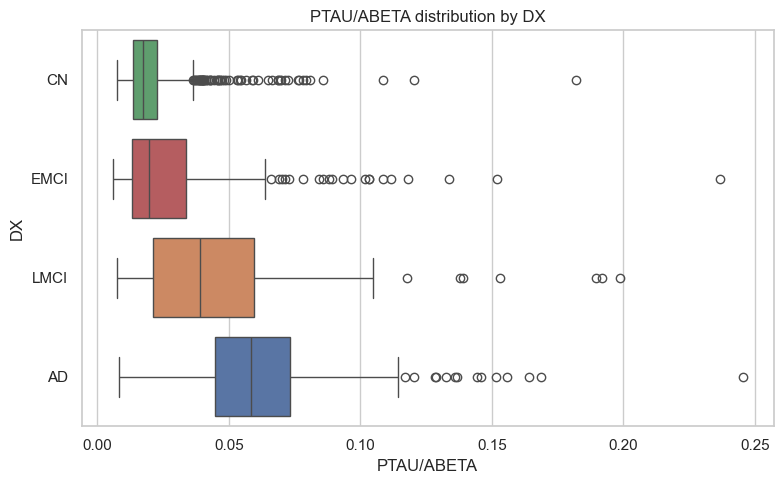

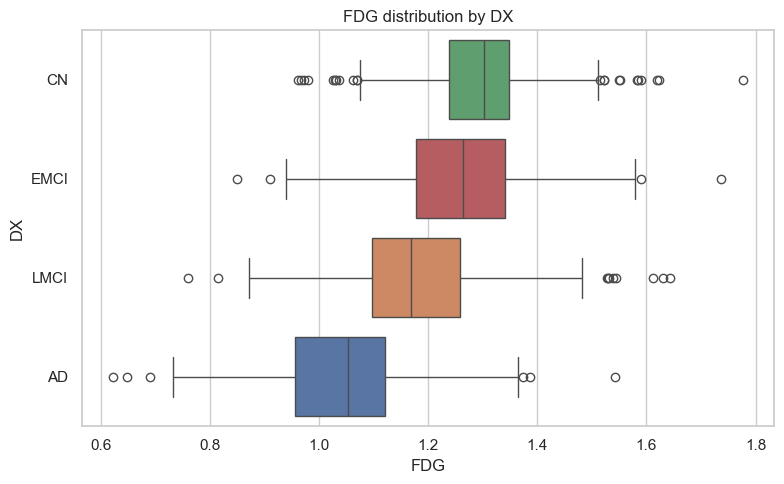

In [31]:
for col in scores:
    viz.box_plot(
        x=col,
        y='DX',
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The `TAU/ABETA` and `PTAU/ABETA` ratio show an increasing trend with disease progression (**AD** > **LMCI** > **EMCI** > **CN**), while `FDG` values ​​tend to decrease with increasing clinical severity. However, the distributions of these indices are highly skewed and characterized by the presence of extreme outliers. We should also choose models that are robust to outliers. Overall, CSF biomarkers remain highly discriminatory and should contribute significant weight to the analysis models.

## MRI Analysis

**Magnetic Resonance Imaging** (**MRI**) measures the brain's volume obtained from structural MRI. These measures have been normalized to `ICV` (Intracranial Volume). They are:
- `Hippocampus/ICV` (relative hippocampal volume)
- `Entorhinal/ICV` (entorhinal cortex)
- `Fusiform/ICV` (fusiform gyrus)
- `MidTemp/ICV` (medial temporal cortex)
- `Ventricles/ICV` (ventricular volume)
- `WholeBrain/ICV` (total brain volume)

In [32]:
scores = ["Hippocampus/ICV", "Entorhinal/ICV", "Fusiform/ICV", "MidTemp/ICV", "Ventricles/ICV", "WholeBrain/ICV"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
Hippocampus/ICV,1934.0,0.004583,0.000833,0.001998,0.003961,0.004614,0.005189,0.007062
Entorhinal/ICV,1934.0,0.002392,0.000546,0.000926,0.002038,0.002411,0.002756,0.005052
Fusiform/ICV,1934.0,0.011657,0.001705,0.006960,0.010480,0.011666,0.012863,0.017320
MidTemp/ICV,1934.0,0.013067,0.001898,0.006109,0.011766,0.013078,0.014343,0.019746
Ventricles/ICV,1934.0,0.025413,0.012771,0.004600,0.015874,0.022459,0.032099,0.078630
WholeBrain/ICV,1934.0,0.681215,0.053811,0.507694,0.642426,0.684457,0.719771,0.836141


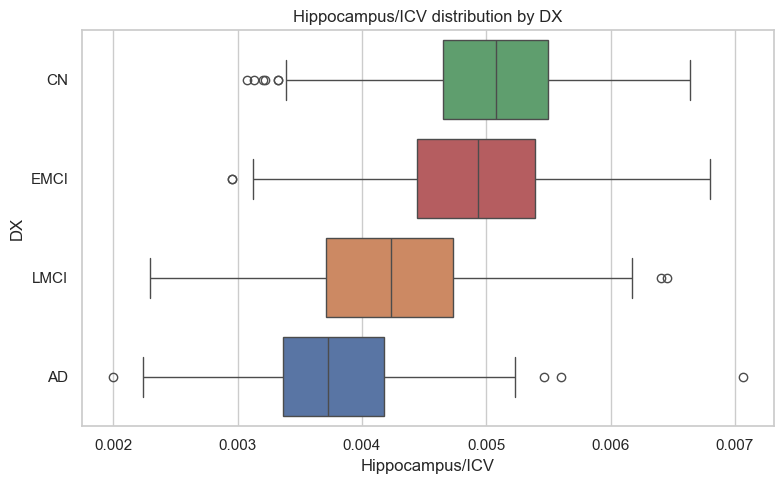

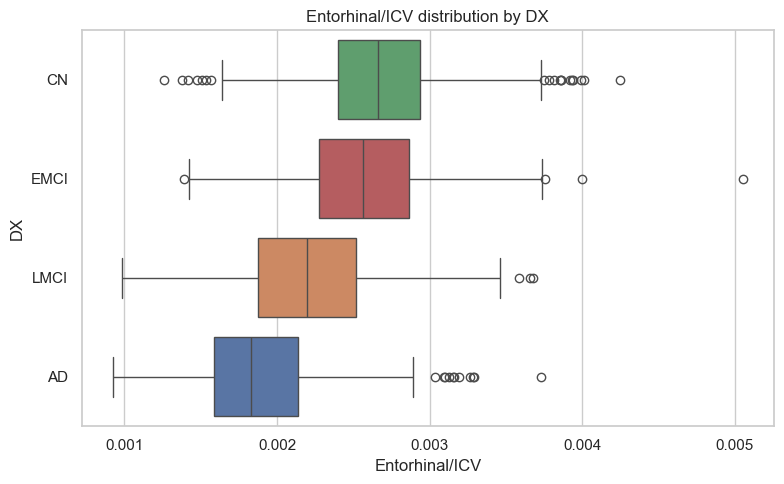

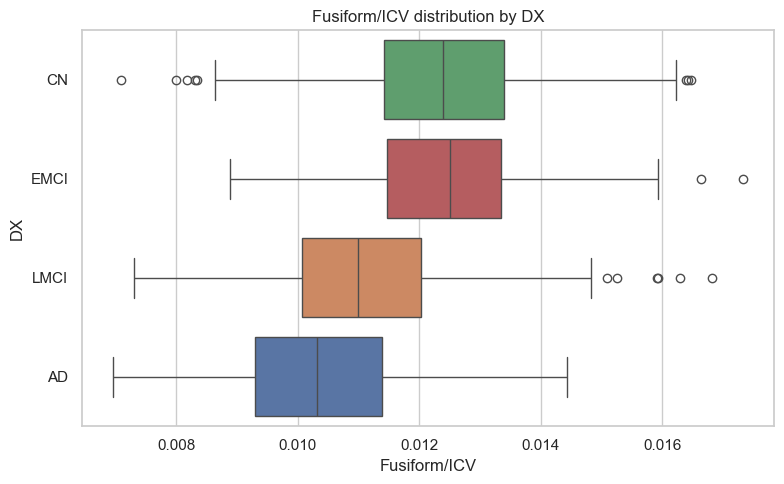

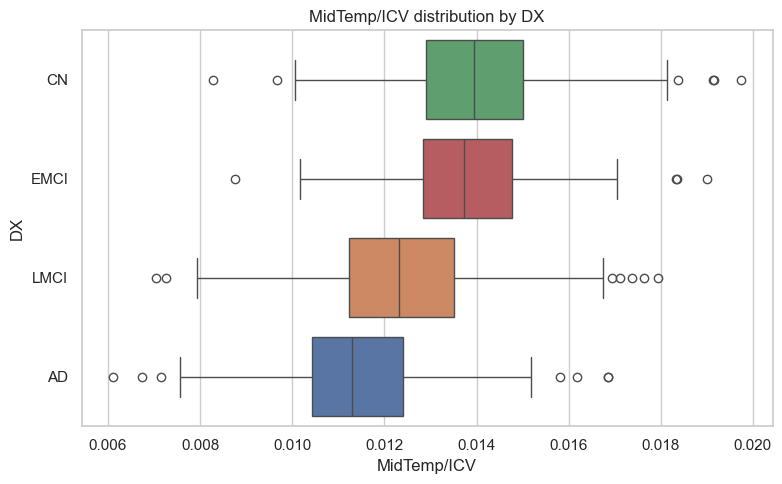

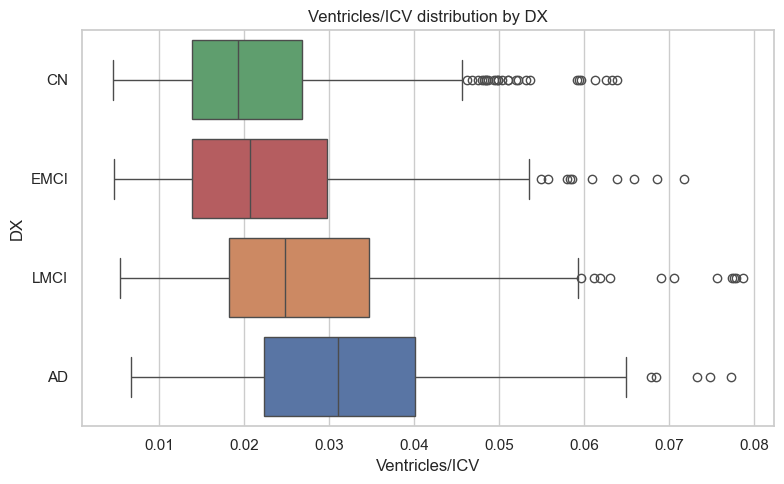

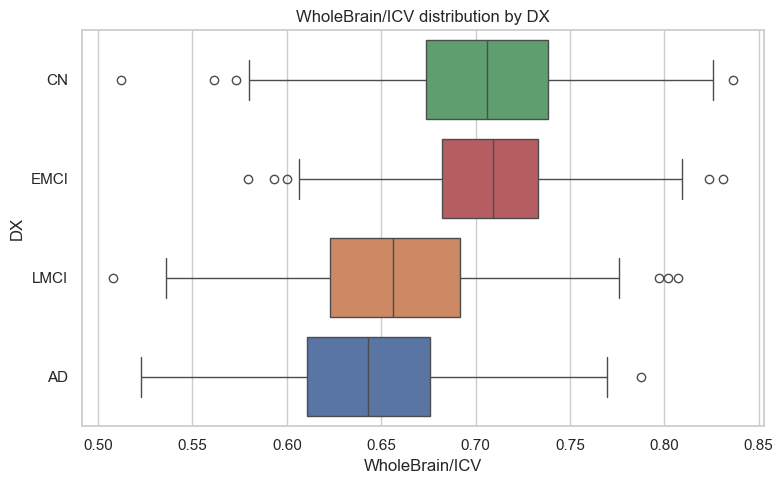

In [33]:
for col in scores:
    viz.box_plot(
        x=col,
        y='DX',
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The observed patterns are consistent with neurodegenerative processes: the `Hippocampus/ICV`, `Entorhinal/ICV`, `Fusiform/ICV`, `Midtemp/ICV`, and `Wholebrain/ICV` ratios tend to decrease with increasing clinical severity, while `Ventricles/ICV` shows an increase. However, the interquartile ranges show a large overlap, indicating that the separation between the groups is not clear-cut.

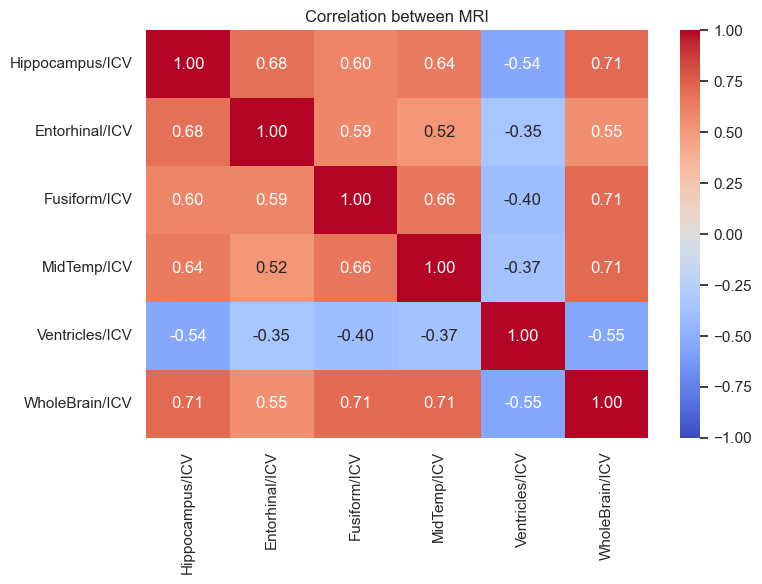

In [34]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between MRI")

A high correlation between different regional volumes is also observed here, while the Ventricles/ICV ratio tends to correlate negatively with many of these measures. 

## Outlier Detection and Analysis

**Outlier Detection** is the process of identifying data points that deviate significantly from the majority of a dataset. These unusual points may indicate errors, rare events, or interesting patterns. 

**Outlier Analysis** is the process of examining and interpreting detected outliers to understand their causes, impact, and relevance. It helps decide whether to remove, correct, or investigate these points further.

In this part, we will deal with Outlier Detection and Outlier Analysis.

### Multivariate Outlier Detection and Analysis

**Multivariate analysis for Outliers** involves examining multiple variables (features) simultaneously to identify outliers, i.e., points whose combined values deviate significantly from the general distribution of the dataset.

We use the multivariate **Local Outlier Factor** (LOF) method that measures how isolated a point is compared to its neighbors based on local density. 

In [35]:
# Initialize the outlier detector
detector = OutlierDetector()

**LOF** is based on distances between points, so normalization is necessary, otherwise features with large values will dominate the distance. We therefore construct a normalized version of the dataset using **Robust Normalization**. 

In [36]:
# Columns to exclude
exclude_cols = ['DX', "PTGENDER"]

# Candidate numeric columns (all except the excluded ones)
candidate_cols = [c for c in dataset.columns if c not in exclude_cols]

# Apply robust normalization
transformer = ADNITransformator(dataset)
normalized_dataset = transformer.robust_normalization(columns=candidate_cols)

Robust normalization applied to columns:
 - AGE: median=72.0, IQR=10.0
 - PTEDUCAT: median=16.0, IQR=4.0
 - APOE4: median=0.0, IQR=1.0
 - MMSE: median=28.0, IQR=3.0
 - CDRSB: median=1.0, IQR=2.0
 - ADAS13: median=14.0, IQR=13.0
 - LDELTOTAL: median=8.0, IQR=9.0
 - FAQ: median=1.0, IQR=5.0
 - MOCA: median=23.0, IQR=5.0
 - TRABSCOR: median=91.0, IQR=73.0
 - RAVLT_immediate: median=36.0, IQR=18.0
 - RAVLT_learning: median=4.0, IQR=5.0
 - RAVLT_perc_forgetting: median=55.5556, IQR=72.7273
 - mPACCdigit: median=-4.0024049999999995, IQR=9.431491000000001
 - EcogPtMem: median=2.0, IQR=0.875
 - EcogPtLang: median=1.622222, IQR=0.7872025
 - EcogPtVisspat: median=1.28571, IQR=0.590476
 - EcogPtPlan: median=1.24, IQR=0.6000000000000001
 - EcogPtOrgan: median=1.366666, IQR=0.6833334999999998
 - EcogPtDivatt: median=1.75, IQR=0.8500000000000001
 - EcogSPMem: median=1.875, IQR=1.4749999999999996
 - EcogSPLang: median=1.3583340000000002, IQR=0.9215274999999998
 - EcogSPVisspat: median=1.169049, IQR=0

We apply LOF analysis to predefined feature groups of the normalized dataset. It runs LOF separately for **Clinical Scores**, **MRI/ICV**, **CSF/ABETA**, and on **all columns**, using **20 neighbors** ([because appears to work well in general](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)). For each group, it selects the **top 5% highest LOF scores as Outliers**, stores their indices and scores, and displays the resulting DataFrame of detected outliers.

In [37]:
# List of groups with their corresponding column names
groups = [
    ("ClinicalScores", ["MMSE", "CDRSB","FAQ", "LDELTOTAL", "TRABSCOR", "MOCA", "ADAS13", "RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting"]),
    ("MRI/ICV", ["Ventricles/ICV", "Hippocampus/ICV", "Entorhinal/ICV", "Fusiform/ICV", "MidTemp/ICV", "WholeBrain/ICV"]),
    ("CSF/ABETA", ["TAU/ABETA", "PTAU/ABETA"]),
]

# Get all columns from the training dataset
all_columns = [c for c in dataset.columns if c != 'DX']

# Add a group that contains all columns
groups.append(("AllColumns", all_columns))

# Create a list to collect all outlier records
lof_outliers_records = []

# LOF parameters
n_neighbors = 20

# Dictionary to store separate DataFrames of outliers for each group
lof_outliers_per_group = {}

# Iterate over groups to calculate LOF
for group_name, cols in groups:
    # Select only columns that are present in the normalized dataset
    cols_present = [c for c in cols if c in normalized_dataset.columns]
    if not cols_present:
        continue  # skip the group if no columns exist in the dataset

    # Run LOF for the columns in the group
    lof_results = detector.detect_by_lof(
        dataset=normalized_dataset,
        columns=cols_present,
        n_neighbors=n_neighbors,
        verbose=False
    )

    # List to store records for this group
    records = []

    # Extract results from the dictionary using the actual n_neighbors key
    scores_arr = np.array(lof_results['scores'])
    th = np.quantile(scores_arr, 0.95)  # Top 5% as Outliers
    for idx, score in zip(lof_results['indices'], lof_results['scores']):
        if score >= th:
            records.append({
                "index": idx,
                "n_neighbors": n_neighbors,
                "lof_score": score,
                "n_features": len(cols_present)
            })

    # If there are outliers, create a DataFrame and store it
    if records:
        df_group = pd.DataFrame(records).sort_values(by="lof_score", ascending=False).reset_index(drop=True)
        lof_outliers_per_group[group_name] = df_group
        # Print the group before showing the table
        print(f"OUTLIERS WITH LOF > 1 FOR GROUP: {group_name}")
        display(df_group)


OUTLIERS WITH LOF > 1 FOR GROUP: ClinicalScores


,index,n_neighbors,lof_score,n_features
0,1281,20,1.891238,10


OUTLIERS WITH LOF > 1 FOR GROUP: MRI/ICV


,index,n_neighbors,lof_score,n_features
0,346,20,2.262332,6
1,1383,20,2.043037,6


OUTLIERS WITH LOF > 1 FOR GROUP: CSF/ABETA


,index,n_neighbors,lof_score,n_features
0,1569,20,3.518005,2
1,586,20,3.511841,2
2,1780,20,3.454527,2
3,798,20,3.166947,2
4,212,20,2.924429,2


OUTLIERS WITH LOF > 1 FOR GROUP: AllColumns


,index,n_neighbors,lof_score,n_features
0,212,20,1.843141,36


Let's see all of them in details. 

### Clinical Scores

In [38]:
display(dataset[[
        "MMSE", "CDRSB", "FAQ", "LDELTOTAL", "TRABSCOR", "MOCA", "ADAS13",
        "RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting"
        ]].describe().T)


,count,mean,std,min,25%,50%,75%,max
MMSE,1934.0,27.379524,2.651848,16.0,26.0000,28.0000,29.0,30.0
CDRSB,1934.0,1.451138,1.762419,0.0,0.0000,1.0000,2.0,10.0
FAQ,1934.0,3.787487,6.034718,0.0,0.0000,1.0000,5.0,30.0
LDELTOTAL,1934.0,7.784385,5.412765,0.0,3.0000,8.0000,12.0,22.0
TRABSCOR,1934.0,117.346949,73.864392,21.0,66.0000,91.0000,139.0,300.0
MOCA,1934.0,23.002585,4.086430,4.0,21.0000,23.0000,26.0,30.0
ADAS13,1934.0,15.904860,9.536558,0.0,9.0000,14.0000,22.0,55.0
RAVLT_immediate,1934.0,36.516546,12.641930,1.0,27.0000,36.0000,45.0,70.0
RAVLT_learning,1934.0,4.491727,2.811675,-4.0,2.0000,4.0000,7.0,12.0
RAVLT_perc_forgetting,1934.0,55.965249,34.733470,-100.0,27.2727,55.5556,100.0,100.0


In [39]:
print(dataset.loc[1281, ["MMSE", "CDRSB", "FAQ", "LDELTOTAL", "TRABSCOR", "MOCA", "ADAS13",
                       "RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting", 'DX']])

MMSE                        30
CDRSB                      0.0
FAQ                          0
LDELTOTAL                   12
TRABSCOR                    49
MOCA                        26
ADAS13                      13
RAVLT_immediate             29
RAVLT_learning               1
RAVLT_perc_forgetting   -100.0
DX                          CN
Name: 1281, dtype: object


**Subject 1281** is marked as an Outlier because of his **excellent cognitive scores**, except on **RAVLT**-type tests. 

`RAVLT_immediate` is below average, but not pathological, `RAVLT_learning` is very low, but the real outlier is `RAVLT_perc_forgetting`. The diagnosis is consistent with the scores, however.

### MRI/ICV

In [40]:
display(dataset[["Ventricles/ICV", "Hippocampus/ICV", "Entorhinal/ICV", "Fusiform/ICV", "MidTemp/ICV", "WholeBrain/ICV"]].describe().T)

,count,mean,std,min,25%,50%,75%,max
Ventricles/ICV,1934.0,0.025413,0.012771,0.004600,0.015874,0.022459,0.032099,0.078630
Hippocampus/ICV,1934.0,0.004583,0.000833,0.001998,0.003961,0.004614,0.005189,0.007062
Entorhinal/ICV,1934.0,0.002392,0.000546,0.000926,0.002038,0.002411,0.002756,0.005052
Fusiform/ICV,1934.0,0.011657,0.001705,0.006960,0.010480,0.011666,0.012863,0.017320
MidTemp/ICV,1934.0,0.013067,0.001898,0.006109,0.011766,0.013078,0.014343,0.019746
WholeBrain/ICV,1934.0,0.681215,0.053811,0.507694,0.642426,0.684457,0.719771,0.836141


In [41]:
display(dataset.loc[[346, 1383], ["Ventricles/ICV", "Hippocampus/ICV", "Entorhinal/ICV", "Fusiform/ICV", "MidTemp/ICV", "WholeBrain/ICV", 'DX']])

,Ventricles/ICV,Hippocampus/ICV,Entorhinal/ICV,Fusiform/ICV,MidTemp/ICV,WholeBrain/ICV,DX
346,0.027232,0.005236,0.005052,0.011909,0.014184,0.706582,EMCI
1383,0.036530,0.004022,0.003730,0.010741,0.013311,0.787621,AD


- **Subject 346** has an outlier for `Entorhinal/ICV`, the **maximum in the dataset**.
- **Subject 1383** has elevated `Entorhinal/ICV` and `WholeBrain/ICV` values, making the local observation rare.

In **Alzheimer's disease**, reductions in `Entorhinal` and `Hippocampus` are expected compared to controls. Higher `Entorhinal/ICV` values ​​are therefore suspicious. Both outliers therefore **do not appear to reflect a biologically plausible profile for their diagnosis**, but this **is not enough to be able to say with certainty**.

### CSF/ABETA

In [42]:
display(dataset[["TAU/ABETA", "PTAU/ABETA"]].describe().T)

,count,mean,std,min,25%,50%,75%,max
TAU/ABETA,1934.0,0.359992,0.253476,0.073807,0.174607,0.265950,0.496250,2.400721
PTAU/ABETA,1934.0,0.035322,0.027075,0.006020,0.015390,0.024998,0.049154,0.245297


In [43]:
display(dataset.loc[[212, 586, 798, 1569, 1780], ["TAU/ABETA", "PTAU/ABETA", 'DX']])

,TAU/ABETA,PTAU/ABETA,DX
212,2.400721,0.245297,AD
586,0.073807,0.006020,EMCI
798,0.248681,0.016978,EMCI
1569,0.271811,0.017228,CN
1780,0.238472,0.016409,LMCI


- **Subject 212** has extremely high `TAU/ABETA` and `PTAU/ABETA` values, **the maximum in the dataset**.
- **Subject 586** has very low `TAU/ABETA` and `PTAU/ABETA` values, near the **minimum in the dataset**.
- **Subject 798** has intermediate `TAU/ABETA` and `PTAU/ABETA` values, making the local observation rare.
- **Subject 1569** has elevated `TAU/ABETA` and slightly elevated `PTAU/ABETA` for a cognitively normal subject, a rare but biologically plausible preclinical AD profile.
- **Subject 1780** has slightly high `TAU/ABETA` and `PTAU/ABETA` values for LMCI, forming a rare but coherent pattern.

In **Alzheimer’s disease**, increased `TAU/ABETA` and `PTAU/ABETA` ratios are expected compared to controls. Extremely low values in EMCI or very high values in CN are therefore **suspicious or rare**, while intermediate alterations in LMCI/EMCI are less surprising. Overall, these outliers **reflect unusual biomarker combinations**, but **not all are necessarily measurement errors**, and interpretation should consider clinical context.


### All Training Set

In [44]:
display(dataset.describe().T)

,count,mean,std,min,25%,50%,75%,max
AGE,1934.0,72.463806,7.290192,50.000000,68.000000,72.000000,78.000000,91.000000
PTGENDER,1934.0,0.527921,0.499349,0.000000,0.000000,1.000000,1.000000,1.000000
PTEDUCAT,1934.0,16.041365,2.749471,4.000000,14.000000,16.000000,18.000000,20.000000
APOE4,1934.0,0.547570,0.649375,0.000000,0.000000,0.000000,1.000000,2.000000
MMSE,1934.0,27.379524,2.651848,16.000000,26.000000,28.000000,29.000000,30.000000
CDRSB,1934.0,1.451138,1.762419,0.000000,0.000000,1.000000,2.000000,10.000000
ADAS13,1934.0,15.904860,9.536558,0.000000,9.000000,14.000000,22.000000,55.000000
LDELTOTAL,1934.0,7.784385,5.412765,0.000000,3.000000,8.000000,12.000000,22.000000
FAQ,1934.0,3.787487,6.034718,0.000000,0.000000,1.000000,5.000000,30.000000
MOCA,1934.0,23.002585,4.086430,4.000000,21.000000,23.000000,26.000000,30.000000


In [45]:
print(dataset.loc[212])

DX                             AD
AGE                            79
PTGENDER                        1
PTEDUCAT                       16
APOE4                           2
MMSE                           23
CDRSB                         6.0
ADAS13                         40
LDELTOTAL                       0
FAQ                            13
MOCA                           11
TRABSCOR                      185
RAVLT_immediate                16
RAVLT_learning                 -1
RAVLT_perc_forgetting       100.0
mPACCdigit               -17.7417
EcogPtMem                   3.125
EcogPtLang                3.33333
EcogPtVisspat             2.83333
EcogPtPlan                    3.2
EcogPtOrgan                   3.5
EcogPtDivatt                  3.5
EcogSPMem                     4.0
EcogSPLang                3.88889
EcogSPVisspat                 4.0
EcogSPPlan                    3.8
EcogSPOrgan               3.83333
EcogSPDivatt                  4.0
FDG                      0.752027
TAU/ABETA     

**Subject 212**, as we already said, has the maximum values of `TAU/ABETA` and `PTAU/ABETA` in the dataset.
The subject also shows **severe cognitive impairment** (`MMSE` = 23, `ADAS13` = 40) and advanced functional decline (`CDRSB` = 6, `FAQ` = 13), consistent with **advanced AD**.
MRI measures reveal **marked atrophy** in `Hippocampus/ICV` and `Entorhinal/ICV`, and a slightly reduced `WholeBrain/ICV`, further supporting the profile of severe disease.
Overall, the combination of **extreme CSF biomarkers, severe cognitive deficits, and advanced atrophy** makes this subject a **rare but biologically plausible outlier** within the AD cohort.

In **Alzheimer’s disease**, extremely high `TAU/ABETA` and `PTAU/ABETA` ratios, combined with severe cognitive decline and limbic atrophy, are expected only in advanced stages. This subject represents one of the most severe cases in the dataset, making the local observation statistically rare but **clinically coherent**.

## Kruskal-Wallis test

The **Kruskal–Wallis test** is a **non-parametric statistical test** used to compare more than two independent groups. It is applied to every numeric variable to evaluate whether the four diagnostic groups (**CN**, **EMCI**, **LMCI**, **AD**) come from the same underlying distribution.

The test works by ranking all observations and then evaluating whether the rank distributions differ across groups. A low p-value (*p < 0.05*) indicates that at least one group has a distribution (commonly interpreted as median) that differs significantly from the others.

- **Null Hypothesis (H₀)**: All diagnostic groups (CN, EMCI, LMCI, AD) come from the same underlying distribution for the feature under analysis. In practical terms, there is no difference in the central tendency (medians) of the groups.
- **Alternative Hypothesis (H₁)**: At least one diagnostic group differs from the others. This means that the distributions (or medians) are not all equal, indicating a statistically significant difference between at least two groups. 

In [46]:
# Select all numeric columns except PTGENDER and APOE4
numeric_cols = [col for col in dataset.select_dtypes(include=[np.number]).columns if col not in ['PTGENDER', 'APOE4']]
kruskal_results = []

for col in numeric_cols:
    # Split the column values by DX class
    groups = [dataset[dataset['DX'] == dx][col].dropna() for dx in dataset['DX'].unique()]
    stat, p = kruskal(*groups)
    kruskal_results.append({"feature": col, "statistic": stat, "p_value": p})

# Convert results to a DataFrame and sort by p-value
kruskal_df = pd.DataFrame(kruskal_results).sort_values('p_value')
display(kruskal_df)

,feature,statistic,p_value
3,CDRSB,1615.823469,0.000000e+00
5,LDELTOTAL,1473.229595,0.000000e+00
12,mPACCdigit,1360.147747,1.308343e-294
4,ADAS13,1135.715686,6.492757e-246
6,FAQ,1116.159754,1.135483e-241
19,EcogSPMem,1080.663444,5.702972e-234
2,MMSE,958.201355,2.100586e-207
7,MOCA,951.728622,5.326081e-206
22,EcogSPPlan,877.650973,6.231717e-190
9,RAVLT_immediate,870.262241,2.495852e-188


The results show that most cognitive, clinical, biomarker, and MRI measures present extremely small p-values, confirming statistically significant differences between diagnostic groups. These group of features exhibit very large Kruskal–Wallis H statistics, indicating strong separation in rank distributions across diagnoses.

Demographic variables also reach statistical significance, although with much smaller H values, meaning that while group differences exist, they are far less pronounced than those observed for clinical or biological markers. 

Some biomarkers and MRI measures have lower statistical significance than cognitive tests, but are still highly significant (very low p-value).

*All numerical features have extremely low p-values, many practically zero, indicating that all features show statistically significant differences between at least two DX classes. Many of the early significant features* (`CDRSB`, `LDELTOTAL`, `mPACCdigit`, `ADAS13`, `FAQ`, `MMSE`) *are cognitive and functional scores.*


## Classification Model Choices

Our classification model choices will be: 
- ***Decision Tree (CART):*** single tree easily plottable and exportable to "if->then" clinical rules, ideal for immediate explanations. 
- ***Random Forest:*** ensemble model robust to outliers and strong collinearity between scores, natively multiclass and useful for exploiting the discriminative power of the CSF and MRI.
- ***Extra Trees:*** more "random" variant of forests that reduces variance on noisy and skewed features.
- ***Adaptive Boosting (of Decision Trees):*** sequential ensemble of shallow decision trees where each tree focuses on correcting the misclassifications of previous ones by adjusting observation weights. Resistant to overfitting on clean data and effective for enhancing weak learners into a strong classifier.
- ***Multinomial Logistic Regression:*** interpretable linear baseline with regularization to counteract multicollinearity of cognitive scores and give simple directional estimates.